In [1]:
import pandas as pd
from pandas import json_normalize
import json
import numpy as np

df_one = pd.read_json("../src/scripts/square-grid-geojson-correct.json")
df_one['grid1'] = 'grid1'
df_one = df_one.pivot(index="grid1",columns="key",values="value").reset_index().add_prefix('correct_grid_one_')
df_one.rename(columns={list(df_one)[0]:'grid1'}, inplace=True)

df_second = pd.read_json("../src/scripts/square-grid-geojson-second-correct.json")
df_second['grid2'] = 'grid2'
df_second = df_second.pivot(index="grid2",columns="key",values="value").reset_index().add_prefix('correct_grid_two_')
df_second.rename(columns={list(df_second)[0]:'grid2'}, inplace=True)

df_third = pd.read_json("../src/scripts/square-grid-geojson-third-correct.json")
df_third['grid3'] = 'grid3'
df_third = df_third.pivot(index="grid3",columns="key",values="value").reset_index().add_prefix('correct_grid_three_')
df_third.rename(columns={list(df_third)[0]:'grid3'}, inplace=True)

df = pd.read_csv("data/change-study-data.csv")
screenSizeDF = df['screen_size'].apply(json.loads)
screenSizeDFList = list(screenSizeDF)
screenSizeDFJSONString = json.dumps(screenSizeDFList)
df = df.join(pd.read_json(screenSizeDFJSONString), how='left', rsuffix='_right')
df = df.dropna(subset=['grid_answers'])
df = df.dropna(subset=['sus_answers'])
df = df.loc[df['sus_answers'] != 'undefined']
df['index'] = np.arange(len(df))

#grid answers
dictValuesDF = df['grid_answers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='grid_answers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['grid_answers'].str.len()),
)).join(pd.DataFrame(sdf['grid_answers'].sum()))
sdf['value'] = np.where(sdf['value'] > 0, 1, 0)
# sdf = pd.pivot_table(sdf,index=['index'],columns=['key'],values=['value'],aggfunc=np.sum).reset_index()
# sdf.columns = sdf.columns.droplevel(0)
sdf = sdf.pivot(index="index",columns="key",values="value").reset_index().add_prefix('submitted_grid_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')

#sus answers
dictValuesDF = df['sus_answers'].apply(json.loads)
dictValuesDFList = list(dictValuesDF)
data = dictValuesDFList
sdf = pd.Series(data, name='sus_answers').to_frame()
sdf['index'] = np.arange(len(sdf))
sdf = pd.DataFrame(dict(
    index=sdf.index.values.repeat(sdf['sus_answers'].str.len()),
)).join(pd.DataFrame(sdf['sus_answers'].sum()))
# sdf = pd.pivot_table(sdf,index=['index'],columns=['key'],values=['questionAnswer'],aggfunc=np.sum).reset_index()
# sdf.columns = sdf.columns.droplevel(0)
sdf = sdf.pivot(index="index",columns="key",values="questionAnswer").reset_index().add_prefix('submitted_sus_')
sdf.rename(columns={list(sdf)[0]:'index'}, inplace=True)
df = df.join(sdf,on='index',how='left', rsuffix='_right')
del df['index_right']

df['grid1'] = 'grid1'
df['grid2'] = 'grid2'
df['grid3'] = 'grid3'

df = pd.merge(df, df_one, left_on="grid1", right_on="grid1", how="left", validate="m:1")
df = pd.merge(df, df_second, left_on="grid2", right_on="grid2", how="left", validate="m:1")
df = pd.merge(df, df_third, left_on="grid3", right_on="grid3", how="left", validate="m:1")

df['iscorrect_grid_box_01'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-1'] == df['correct_grid_one_grid-box-1'], np.where(df['map_version']==1, df['submitted_grid_grid-box-1'] == df['correct_grid_two_grid-box-1'], np.where(df['map_version']==2, df['submitted_grid_grid-box-1'] == df['correct_grid_three_grid-box-1'], '')))
df['iscorrect_grid_box_02'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-2'] == df['correct_grid_one_grid-box-2'], np.where(df['map_version']==1, df['submitted_grid_grid-box-2'] == df['correct_grid_two_grid-box-2'], np.where(df['map_version']==2, df['submitted_grid_grid-box-2'] == df['correct_grid_three_grid-box-2'], '')))
df['iscorrect_grid_box_03'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-3'] == df['correct_grid_one_grid-box-3'], np.where(df['map_version']==1, df['submitted_grid_grid-box-3'] == df['correct_grid_two_grid-box-3'], np.where(df['map_version']==2, df['submitted_grid_grid-box-3'] == df['correct_grid_three_grid-box-3'], '')))
df['iscorrect_grid_box_04'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-4'] == df['correct_grid_one_grid-box-4'], np.where(df['map_version']==1, df['submitted_grid_grid-box-4'] == df['correct_grid_two_grid-box-4'], np.where(df['map_version']==2, df['submitted_grid_grid-box-4'] == df['correct_grid_three_grid-box-4'], '')))
df['iscorrect_grid_box_05'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-5'] == df['correct_grid_one_grid-box-5'], np.where(df['map_version']==1, df['submitted_grid_grid-box-5'] == df['correct_grid_two_grid-box-5'], np.where(df['map_version']==2, df['submitted_grid_grid-box-5'] == df['correct_grid_three_grid-box-5'], '')))
df['iscorrect_grid_box_06'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-6'] == df['correct_grid_one_grid-box-6'], np.where(df['map_version']==1, df['submitted_grid_grid-box-6'] == df['correct_grid_two_grid-box-6'], np.where(df['map_version']==2, df['submitted_grid_grid-box-6'] == df['correct_grid_three_grid-box-6'], '')))
df['iscorrect_grid_box_07'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-7'] == df['correct_grid_one_grid-box-7'], np.where(df['map_version']==1, df['submitted_grid_grid-box-7'] == df['correct_grid_two_grid-box-7'], np.where(df['map_version']==2, df['submitted_grid_grid-box-7'] == df['correct_grid_three_grid-box-7'], '')))
df['iscorrect_grid_box_08'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-8'] == df['correct_grid_one_grid-box-8'], np.where(df['map_version']==1, df['submitted_grid_grid-box-8'] == df['correct_grid_two_grid-box-8'], np.where(df['map_version']==2, df['submitted_grid_grid-box-8'] == df['correct_grid_three_grid-box-8'], '')))
df['iscorrect_grid_box_09'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-9'] == df['correct_grid_one_grid-box-9'], np.where(df['map_version']==1, df['submitted_grid_grid-box-9'] == df['correct_grid_two_grid-box-9'], np.where(df['map_version']==2, df['submitted_grid_grid-box-9'] == df['correct_grid_three_grid-box-9'], '')))

df['iscorrect_grid_box_10'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-10'] == df['correct_grid_one_grid-box-10'], np.where(df['map_version']==1, df['submitted_grid_grid-box-10'] == df['correct_grid_two_grid-box-10'], np.where(df['map_version']==2, df['submitted_grid_grid-box-10'] == df['correct_grid_three_grid-box-10'], '')))
df['iscorrect_grid_box_11'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-11'] == df['correct_grid_one_grid-box-11'], np.where(df['map_version']==1, df['submitted_grid_grid-box-11'] == df['correct_grid_two_grid-box-11'], np.where(df['map_version']==2, df['submitted_grid_grid-box-11'] == df['correct_grid_three_grid-box-11'], '')))
df['iscorrect_grid_box_12'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-12'] == df['correct_grid_one_grid-box-12'], np.where(df['map_version']==1, df['submitted_grid_grid-box-12'] == df['correct_grid_two_grid-box-12'], np.where(df['map_version']==2, df['submitted_grid_grid-box-12'] == df['correct_grid_three_grid-box-12'], '')))
df['iscorrect_grid_box_13'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-13'] == df['correct_grid_one_grid-box-13'], np.where(df['map_version']==1, df['submitted_grid_grid-box-13'] == df['correct_grid_two_grid-box-13'], np.where(df['map_version']==2, df['submitted_grid_grid-box-13'] == df['correct_grid_three_grid-box-13'], '')))
df['iscorrect_grid_box_14'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-14'] == df['correct_grid_one_grid-box-14'], np.where(df['map_version']==1, df['submitted_grid_grid-box-14'] == df['correct_grid_two_grid-box-14'], np.where(df['map_version']==2, df['submitted_grid_grid-box-14'] == df['correct_grid_three_grid-box-14'], '')))
df['iscorrect_grid_box_15'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-15'] == df['correct_grid_one_grid-box-15'], np.where(df['map_version']==1, df['submitted_grid_grid-box-15'] == df['correct_grid_two_grid-box-15'], np.where(df['map_version']==2, df['submitted_grid_grid-box-15'] == df['correct_grid_three_grid-box-15'], '')))
df['iscorrect_grid_box_16'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-16'] == df['correct_grid_one_grid-box-16'], np.where(df['map_version']==1, df['submitted_grid_grid-box-16'] == df['correct_grid_two_grid-box-16'], np.where(df['map_version']==2, df['submitted_grid_grid-box-16'] == df['correct_grid_three_grid-box-16'], '')))
df['iscorrect_grid_box_17'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-17'] == df['correct_grid_one_grid-box-17'], np.where(df['map_version']==1, df['submitted_grid_grid-box-17'] == df['correct_grid_two_grid-box-17'], np.where(df['map_version']==2, df['submitted_grid_grid-box-17'] == df['correct_grid_three_grid-box-17'], '')))
df['iscorrect_grid_box_18'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-18'] == df['correct_grid_one_grid-box-18'], np.where(df['map_version']==1, df['submitted_grid_grid-box-18'] == df['correct_grid_two_grid-box-18'], np.where(df['map_version']==2, df['submitted_grid_grid-box-18'] == df['correct_grid_three_grid-box-18'], '')))
df['iscorrect_grid_box_19'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-19'] == df['correct_grid_one_grid-box-19'], np.where(df['map_version']==1, df['submitted_grid_grid-box-19'] == df['correct_grid_two_grid-box-19'], np.where(df['map_version']==2, df['submitted_grid_grid-box-19'] == df['correct_grid_three_grid-box-19'], '')))

df['iscorrect_grid_box_20'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-20'] == df['correct_grid_one_grid-box-20'], np.where(df['map_version']==1, df['submitted_grid_grid-box-20'] == df['correct_grid_two_grid-box-20'], np.where(df['map_version']==2, df['submitted_grid_grid-box-20'] == df['correct_grid_three_grid-box-20'], '')))
df['iscorrect_grid_box_21'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-21'] == df['correct_grid_one_grid-box-21'], np.where(df['map_version']==1, df['submitted_grid_grid-box-21'] == df['correct_grid_two_grid-box-21'], np.where(df['map_version']==2, df['submitted_grid_grid-box-21'] == df['correct_grid_three_grid-box-21'], '')))
df['iscorrect_grid_box_22'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-22'] == df['correct_grid_one_grid-box-22'], np.where(df['map_version']==1, df['submitted_grid_grid-box-22'] == df['correct_grid_two_grid-box-22'], np.where(df['map_version']==2, df['submitted_grid_grid-box-22'] == df['correct_grid_three_grid-box-22'], '')))
df['iscorrect_grid_box_23'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-23'] == df['correct_grid_one_grid-box-23'], np.where(df['map_version']==1, df['submitted_grid_grid-box-23'] == df['correct_grid_two_grid-box-23'], np.where(df['map_version']==2, df['submitted_grid_grid-box-23'] == df['correct_grid_three_grid-box-23'], '')))
df['iscorrect_grid_box_24'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-24'] == df['correct_grid_one_grid-box-24'], np.where(df['map_version']==1, df['submitted_grid_grid-box-24'] == df['correct_grid_two_grid-box-24'], np.where(df['map_version']==2, df['submitted_grid_grid-box-24'] == df['correct_grid_three_grid-box-24'], '')))
df['iscorrect_grid_box_25'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-25'] == df['correct_grid_one_grid-box-25'], np.where(df['map_version']==1, df['submitted_grid_grid-box-25'] == df['correct_grid_two_grid-box-25'], np.where(df['map_version']==2, df['submitted_grid_grid-box-25'] == df['correct_grid_three_grid-box-25'], '')))
df['iscorrect_grid_box_26'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-26'] == df['correct_grid_one_grid-box-26'], np.where(df['map_version']==1, df['submitted_grid_grid-box-26'] == df['correct_grid_two_grid-box-26'], np.where(df['map_version']==2, df['submitted_grid_grid-box-26'] == df['correct_grid_three_grid-box-26'], '')))
df['iscorrect_grid_box_27'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-27'] == df['correct_grid_one_grid-box-27'], np.where(df['map_version']==1, df['submitted_grid_grid-box-27'] == df['correct_grid_two_grid-box-27'], np.where(df['map_version']==2, df['submitted_grid_grid-box-27'] == df['correct_grid_three_grid-box-27'], '')))
df['iscorrect_grid_box_28'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-28'] == df['correct_grid_one_grid-box-28'], np.where(df['map_version']==1, df['submitted_grid_grid-box-28'] == df['correct_grid_two_grid-box-28'], np.where(df['map_version']==2, df['submitted_grid_grid-box-28'] == df['correct_grid_three_grid-box-28'], '')))
df['iscorrect_grid_box_29'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-29'] == df['correct_grid_one_grid-box-29'], np.where(df['map_version']==1, df['submitted_grid_grid-box-29'] == df['correct_grid_two_grid-box-29'], np.where(df['map_version']==2, df['submitted_grid_grid-box-29'] == df['correct_grid_three_grid-box-29'], '')))

df['iscorrect_grid_box_30'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-30'] == df['correct_grid_one_grid-box-30'], np.where(df['map_version']==1, df['submitted_grid_grid-box-30'] == df['correct_grid_two_grid-box-30'], np.where(df['map_version']==2, df['submitted_grid_grid-box-30'] == df['correct_grid_three_grid-box-30'], '')))
df['iscorrect_grid_box_31'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-31'] == df['correct_grid_one_grid-box-31'], np.where(df['map_version']==1, df['submitted_grid_grid-box-31'] == df['correct_grid_two_grid-box-31'], np.where(df['map_version']==2, df['submitted_grid_grid-box-31'] == df['correct_grid_three_grid-box-31'], '')))
df['iscorrect_grid_box_32'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-32'] == df['correct_grid_one_grid-box-32'], np.where(df['map_version']==1, df['submitted_grid_grid-box-32'] == df['correct_grid_two_grid-box-32'], np.where(df['map_version']==2, df['submitted_grid_grid-box-32'] == df['correct_grid_three_grid-box-32'], '')))
df['iscorrect_grid_box_33'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-33'] == df['correct_grid_one_grid-box-33'], np.where(df['map_version']==1, df['submitted_grid_grid-box-33'] == df['correct_grid_two_grid-box-33'], np.where(df['map_version']==2, df['submitted_grid_grid-box-33'] == df['correct_grid_three_grid-box-33'], '')))
df['iscorrect_grid_box_34'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-34'] == df['correct_grid_one_grid-box-34'], np.where(df['map_version']==1, df['submitted_grid_grid-box-34'] == df['correct_grid_two_grid-box-34'], np.where(df['map_version']==2, df['submitted_grid_grid-box-34'] == df['correct_grid_three_grid-box-34'], '')))
df['iscorrect_grid_box_35'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-35'] == df['correct_grid_one_grid-box-35'], np.where(df['map_version']==1, df['submitted_grid_grid-box-35'] == df['correct_grid_two_grid-box-35'], np.where(df['map_version']==2, df['submitted_grid_grid-box-35'] == df['correct_grid_three_grid-box-35'], '')))
df['iscorrect_grid_box_36'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-36'] == df['correct_grid_one_grid-box-36'], np.where(df['map_version']==1, df['submitted_grid_grid-box-36'] == df['correct_grid_two_grid-box-36'], np.where(df['map_version']==2, df['submitted_grid_grid-box-36'] == df['correct_grid_three_grid-box-36'], '')))
df['iscorrect_grid_box_37'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-37'] == df['correct_grid_one_grid-box-37'], np.where(df['map_version']==1, df['submitted_grid_grid-box-37'] == df['correct_grid_two_grid-box-37'], np.where(df['map_version']==2, df['submitted_grid_grid-box-37'] == df['correct_grid_three_grid-box-37'], '')))
df['iscorrect_grid_box_38'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-38'] == df['correct_grid_one_grid-box-38'], np.where(df['map_version']==1, df['submitted_grid_grid-box-38'] == df['correct_grid_two_grid-box-38'], np.where(df['map_version']==2, df['submitted_grid_grid-box-38'] == df['correct_grid_three_grid-box-38'], '')))
df['iscorrect_grid_box_39'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-39'] == df['correct_grid_one_grid-box-39'], np.where(df['map_version']==1, df['submitted_grid_grid-box-39'] == df['correct_grid_two_grid-box-39'], np.where(df['map_version']==2, df['submitted_grid_grid-box-39'] == df['correct_grid_three_grid-box-39'], '')))

df['iscorrect_grid_box_40'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-40'] == df['correct_grid_one_grid-box-40'], np.where(df['map_version']==1, df['submitted_grid_grid-box-40'] == df['correct_grid_two_grid-box-40'], np.where(df['map_version']==2, df['submitted_grid_grid-box-40'] == df['correct_grid_three_grid-box-40'], '')))
df['iscorrect_grid_box_41'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-41'] == df['correct_grid_one_grid-box-41'], np.where(df['map_version']==1, df['submitted_grid_grid-box-41'] == df['correct_grid_two_grid-box-41'], np.where(df['map_version']==2, df['submitted_grid_grid-box-41'] == df['correct_grid_three_grid-box-41'], '')))
df['iscorrect_grid_box_42'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-42'] == df['correct_grid_one_grid-box-42'], np.where(df['map_version']==1, df['submitted_grid_grid-box-42'] == df['correct_grid_two_grid-box-42'], np.where(df['map_version']==2, df['submitted_grid_grid-box-42'] == df['correct_grid_three_grid-box-42'], '')))

# 
# df['grid_box_correct_01'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-1'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-1'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-1'], '')))
# df['grid_box_correct_02'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-2'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-2'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-2'], '')))
# df['grid_box_correct_03'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-3'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-3'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-3'], '')))
# df['grid_box_correct_04'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-4'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-4'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-4'], '')))
# df['grid_box_correct_05'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-5'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-5'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-5'], '')))
# df['grid_box_correct_06'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-6'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-6'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-6'], '')))
# df['grid_box_correct_07'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-7'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-7'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-7'], '')))
# df['grid_box_correct_08'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-8'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-8'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-8'], '')))
# df['grid_box_correct_09'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-9'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-9'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-9'], '')))
# df['grid_box_correct_10'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-10'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-10'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-10'], '')))
# df['grid_box_correct_11'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-11'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-11'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-11'], '')))
# df['grid_box_correct_12'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-12'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-12'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-12'], '')))
# df['grid_box_correct_13'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-13'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-13'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-13'], '')))
# df['grid_box_correct_14'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-14'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-14'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-14'], '')))
# df['grid_box_correct_15'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-15'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-15'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-15'], '')))
# df['grid_box_correct_16'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-16'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-16'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-16'], '')))
# df['grid_box_correct_17'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-17'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-17'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-17'], '')))
# df['grid_box_correct_18'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-18'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-18'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-18'], '')))
# df['grid_box_correct_19'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-19'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-19'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-19'], '')))
# df['grid_box_correct_20'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-20'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-20'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-20'], '')))
# df['grid_box_correct_21'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-21'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-21'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-21'], '')))
# df['grid_box_correct_22'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-22'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-22'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-22'], '')))
# df['grid_box_correct_23'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-23'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-23'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-23'], '')))
# df['grid_box_correct_24'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-24'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-24'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-24'], '')))
# df['grid_box_correct_25'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-25'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-25'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-25'], '')))
# df['grid_box_correct_26'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-26'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-26'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-26'], '')))
# df['grid_box_correct_27'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-27'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-27'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-27'], '')))
# df['grid_box_correct_28'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-28'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-28'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-28'], '')))
# df['grid_box_correct_29'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-29'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-29'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-29'], '')))
# df['grid_box_correct_30'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-30'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-30'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-30'], '')))
# df['grid_box_correct_31'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-31'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-31'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-31'], '')))
# df['grid_box_correct_32'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-32'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-32'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-32'], '')))
# df['grid_box_correct_33'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-33'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-33'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-33'], '')))
# df['grid_box_correct_34'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-34'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-34'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-34'], '')))
# df['grid_box_correct_35'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-35'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-35'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-35'], '')))
# df['grid_box_correct_36'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-36'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-36'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-36'], '')))
# df['grid_box_correct_37'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-37'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-37'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-37'], '')))
# df['grid_box_correct_38'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-38'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-38'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-38'], '')))
# df['grid_box_correct_39'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-39'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-39'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-39'], '')))
# df['grid_box_correct_40'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-40'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-40'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-40'], '')))
# df['grid_box_correct_41'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-41'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-41'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-41'], '')))
# df['grid_box_correct_42'] = np.where(df['map_version']==0,  df['correct_grid_one_grid-box-42'], np.where(df['map_version']==1, df['correct_grid_two_grid-box-42'], np.where(df['map_version']==2, df['correct_grid_three_grid-box-42'], '')))

del  df['correct_grid_one_grid-box-1']
del  df['correct_grid_two_grid-box-1']
del  df['correct_grid_three_grid-box-1']

del  df['correct_grid_one_grid-box-2']
del  df['correct_grid_two_grid-box-2']
del  df['correct_grid_three_grid-box-2']

del  df['correct_grid_one_grid-box-3']
del  df['correct_grid_two_grid-box-3']
del  df['correct_grid_three_grid-box-3']

del  df['correct_grid_one_grid-box-4']
del  df['correct_grid_two_grid-box-4']
del  df['correct_grid_three_grid-box-4']

del  df['correct_grid_one_grid-box-5']
del  df['correct_grid_two_grid-box-5']
del  df['correct_grid_three_grid-box-5']

del  df['correct_grid_one_grid-box-6']
del  df['correct_grid_two_grid-box-6']
del  df['correct_grid_three_grid-box-6']

del  df['correct_grid_one_grid-box-7']
del  df['correct_grid_two_grid-box-7']
del  df['correct_grid_three_grid-box-7']

del  df['correct_grid_one_grid-box-8']
del  df['correct_grid_two_grid-box-8']
del  df['correct_grid_three_grid-box-8']

del  df['correct_grid_one_grid-box-9']
del  df['correct_grid_two_grid-box-9']
del  df['correct_grid_three_grid-box-9']

del  df['correct_grid_one_grid-box-10']
del  df['correct_grid_two_grid-box-10']
del  df['correct_grid_three_grid-box-10']

del  df['correct_grid_one_grid-box-11']
del  df['correct_grid_two_grid-box-11']
del  df['correct_grid_three_grid-box-11']

del  df['correct_grid_one_grid-box-12']
del  df['correct_grid_two_grid-box-12']
del  df['correct_grid_three_grid-box-12']

del  df['correct_grid_one_grid-box-13']
del  df['correct_grid_two_grid-box-13']
del  df['correct_grid_three_grid-box-13']

del  df['correct_grid_one_grid-box-14']
del  df['correct_grid_two_grid-box-14']
del  df['correct_grid_three_grid-box-14']

del  df['correct_grid_one_grid-box-15']
del  df['correct_grid_two_grid-box-15']
del  df['correct_grid_three_grid-box-15']

del  df['correct_grid_one_grid-box-16']
del  df['correct_grid_two_grid-box-16']
del  df['correct_grid_three_grid-box-16']

del  df['correct_grid_one_grid-box-17']
del  df['correct_grid_two_grid-box-17']
del  df['correct_grid_three_grid-box-17']

del  df['correct_grid_one_grid-box-18']
del  df['correct_grid_two_grid-box-18']
del  df['correct_grid_three_grid-box-18']

del  df['correct_grid_one_grid-box-19']
del  df['correct_grid_two_grid-box-19']
del  df['correct_grid_three_grid-box-19']

del  df['correct_grid_one_grid-box-20']
del  df['correct_grid_two_grid-box-20']
del  df['correct_grid_three_grid-box-20']

del  df['correct_grid_one_grid-box-21']
del  df['correct_grid_two_grid-box-21']
del  df['correct_grid_three_grid-box-21']

del  df['correct_grid_one_grid-box-22']
del  df['correct_grid_two_grid-box-22']
del  df['correct_grid_three_grid-box-22']

del  df['correct_grid_one_grid-box-23']
del  df['correct_grid_two_grid-box-23']
del  df['correct_grid_three_grid-box-23']

del  df['correct_grid_one_grid-box-24']
del  df['correct_grid_two_grid-box-24']
del  df['correct_grid_three_grid-box-24']

del  df['correct_grid_one_grid-box-25']
del  df['correct_grid_two_grid-box-25']
del  df['correct_grid_three_grid-box-25']

del  df['correct_grid_one_grid-box-26']
del  df['correct_grid_two_grid-box-26']
del  df['correct_grid_three_grid-box-26']

del  df['correct_grid_one_grid-box-27']
del  df['correct_grid_two_grid-box-27']
del  df['correct_grid_three_grid-box-27']

del  df['correct_grid_one_grid-box-28']
del  df['correct_grid_two_grid-box-28']
del  df['correct_grid_three_grid-box-28']

del  df['correct_grid_one_grid-box-29']
del  df['correct_grid_two_grid-box-29']
del  df['correct_grid_three_grid-box-29']

del  df['correct_grid_one_grid-box-30']
del  df['correct_grid_two_grid-box-30']
del  df['correct_grid_three_grid-box-30']

del  df['correct_grid_one_grid-box-31']
del  df['correct_grid_two_grid-box-31']
del  df['correct_grid_three_grid-box-31']

del  df['correct_grid_one_grid-box-32']
del  df['correct_grid_two_grid-box-32']
del  df['correct_grid_three_grid-box-32']

del  df['correct_grid_one_grid-box-33']
del  df['correct_grid_two_grid-box-33']
del  df['correct_grid_three_grid-box-33']

del  df['correct_grid_one_grid-box-34']
del  df['correct_grid_two_grid-box-34']
del  df['correct_grid_three_grid-box-34']

del  df['correct_grid_one_grid-box-35']
del  df['correct_grid_two_grid-box-35']
del  df['correct_grid_three_grid-box-35']

del  df['correct_grid_one_grid-box-36']
del  df['correct_grid_two_grid-box-36']
del  df['correct_grid_three_grid-box-36']

del  df['correct_grid_one_grid-box-37']
del  df['correct_grid_two_grid-box-37']
del  df['correct_grid_three_grid-box-37']

del  df['correct_grid_one_grid-box-38']
del  df['correct_grid_two_grid-box-38']
del  df['correct_grid_three_grid-box-38']

del  df['correct_grid_one_grid-box-39']
del  df['correct_grid_two_grid-box-39']
del  df['correct_grid_three_grid-box-39']

del  df['correct_grid_one_grid-box-40']
del  df['correct_grid_two_grid-box-40']
del  df['correct_grid_three_grid-box-40']

del  df['correct_grid_one_grid-box-41']
del  df['correct_grid_two_grid-box-41']
del  df['correct_grid_three_grid-box-41']

del  df['correct_grid_one_grid-box-42']
del  df['correct_grid_two_grid-box-42']
del  df['correct_grid_three_grid-box-42']
                                     
# df['grid_box_submitted_01'] = df['submitted_grid_grid-box-1']
# df['grid_box_submitted_02'] = df['submitted_grid_grid-box-2']
# df['grid_box_submitted_03'] = df['submitted_grid_grid-box-3']
# df['grid_box_submitted_04'] = df['submitted_grid_grid-box-4']
# df['grid_box_submitted_05'] = df['submitted_grid_grid-box-5']
# df['grid_box_submitted_06'] = df['submitted_grid_grid-box-6']
# df['grid_box_submitted_07'] = df['submitted_grid_grid-box-7']
# df['grid_box_submitted_08'] = df['submitted_grid_grid-box-8']
# df['grid_box_submitted_09'] = df['submitted_grid_grid-box-9']

# df['grid_box_submitted_10'] = df['submitted_grid_grid-box-10']
# df['grid_box_submitted_11'] = df['submitted_grid_grid-box-11']
# df['grid_box_submitted_12'] = df['submitted_grid_grid-box-12']
# df['grid_box_submitted_13'] = df['submitted_grid_grid-box-13']
# df['grid_box_submitted_14'] = df['submitted_grid_grid-box-14']
# df['grid_box_submitted_15'] = df['submitted_grid_grid-box-15']
# df['grid_box_submitted_16'] = df['submitted_grid_grid-box-16']
# df['grid_box_submitted_17'] = df['submitted_grid_grid-box-17']
# df['grid_box_submitted_18'] = df['submitted_grid_grid-box-18']
# df['grid_box_submitted_19'] = df['submitted_grid_grid-box-19']

# df['grid_box_submitted_20'] = df['submitted_grid_grid-box-20']
# df['grid_box_submitted_21'] = df['submitted_grid_grid-box-21']
# df['grid_box_submitted_22'] = df['submitted_grid_grid-box-22']
# df['grid_box_submitted_23'] = df['submitted_grid_grid-box-23']
# df['grid_box_submitted_24'] = df['submitted_grid_grid-box-24']
# df['grid_box_submitted_25'] = df['submitted_grid_grid-box-25']
# df['grid_box_submitted_26'] = df['submitted_grid_grid-box-26']
# df['grid_box_submitted_27'] = df['submitted_grid_grid-box-27']
# df['grid_box_submitted_28'] = df['submitted_grid_grid-box-28']
# df['grid_box_submitted_29'] = df['submitted_grid_grid-box-29']
 
# df['grid_box_submitted_30'] = df['submitted_grid_grid-box-30']
# df['grid_box_submitted_31'] = df['submitted_grid_grid-box-31']
# df['grid_box_submitted_32'] = df['submitted_grid_grid-box-32']
# df['grid_box_submitted_33'] = df['submitted_grid_grid-box-33']
# df['grid_box_submitted_34'] = df['submitted_grid_grid-box-34']
# df['grid_box_submitted_35'] = df['submitted_grid_grid-box-35']
# df['grid_box_submitted_36'] = df['submitted_grid_grid-box-36']
# df['grid_box_submitted_37'] = df['submitted_grid_grid-box-37']
# df['grid_box_submitted_38'] = df['submitted_grid_grid-box-38']
# df['grid_box_submitted_39'] = df['submitted_grid_grid-box-39']
    
# df['grid_box_submitted_40'] = df['submitted_grid_grid-box-40']
# df['grid_box_submitted_41'] = df['submitted_grid_grid-box-41']
# df['grid_box_submitted_42'] = df['submitted_grid_grid-box-42']                                  

del  df['submitted_grid_grid-box-0']
del  df['submitted_grid_grid-box-1']
del  df['submitted_grid_grid-box-2']
del  df['submitted_grid_grid-box-3']
del  df['submitted_grid_grid-box-4']
del  df['submitted_grid_grid-box-5']
del  df['submitted_grid_grid-box-6']
del  df['submitted_grid_grid-box-7']
del  df['submitted_grid_grid-box-8']
del  df['submitted_grid_grid-box-9']

del  df['submitted_grid_grid-box-10']
del  df['submitted_grid_grid-box-11']
del  df['submitted_grid_grid-box-12']
del  df['submitted_grid_grid-box-13']
del  df['submitted_grid_grid-box-14']
del  df['submitted_grid_grid-box-15']
del  df['submitted_grid_grid-box-16']
del  df['submitted_grid_grid-box-17']
del  df['submitted_grid_grid-box-18']
del  df['submitted_grid_grid-box-19']

del  df['submitted_grid_grid-box-20']
del  df['submitted_grid_grid-box-21']
del  df['submitted_grid_grid-box-22']
del  df['submitted_grid_grid-box-23']
del  df['submitted_grid_grid-box-24']
del  df['submitted_grid_grid-box-25']
del  df['submitted_grid_grid-box-26']
del  df['submitted_grid_grid-box-27']
del  df['submitted_grid_grid-box-28']
del  df['submitted_grid_grid-box-29']
                                     
del  df['submitted_grid_grid-box-30']
del  df['submitted_grid_grid-box-31']
del  df['submitted_grid_grid-box-32']
del  df['submitted_grid_grid-box-33']
del  df['submitted_grid_grid-box-34']
del  df['submitted_grid_grid-box-35']
del  df['submitted_grid_grid-box-36']
del  df['submitted_grid_grid-box-37']
del  df['submitted_grid_grid-box-38']
del  df['submitted_grid_grid-box-39']

                                                                          
del  df['submitted_grid_grid-box-40']
del  df['submitted_grid_grid-box-41']
del  df['submitted_grid_grid-box-42']

df['sus-score'] = ((df['submitted_sus_sus-question-1'] - 1).astype(float)+  
                    (5 - df['submitted_sus_sus-question-2']).astype(float) +
                    (df['submitted_sus_sus-question-3'] - 1).astype(float) + 
                    (5 - df['submitted_sus_sus-question-4']).astype(float) +
                    (df['submitted_sus_sus-question-5'] - 1).astype(float) + 
                    (5 - df['submitted_sus_sus-question-6']).astype(float) +
                    (df['submitted_sus_sus-question-7'] - 1).astype(float) + 
                    (5 - df['submitted_sus_sus-question-8']).astype(float) +
                    (df['submitted_sus_sus-question-9'] - 1).astype(float) +
                    (5 - df['submitted_sus_sus-question-10'])).astype(float) * 2.5

del  df['submitted_sus_sus-question-1']
del  df['submitted_sus_sus-question-2']
del  df['submitted_sus_sus-question-3']
del  df['submitted_sus_sus-question-4']
del  df['submitted_sus_sus-question-5']
del  df['submitted_sus_sus-question-6']
del  df['submitted_sus_sus-question-7']
del  df['submitted_sus_sus-question-8']
del  df['submitted_sus_sus-question-9']
del  df['submitted_sus_sus-question-10']

# df['iscorrect_grid_box_02'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-2'] == df['correct_grid_one_grid-box-2'], np.where(df['map_version']==1, df['submitted_grid_grid-box-2'] == df['correct_grid_two_grid-box-2'], np.where(df['map_version']==2, df['submitted_grid_grid-box-2'] == df['correct_grid_three_grid-box-2'], '')))
# df['iscorrect_grid_box_03'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-3'] == df['correct_grid_one_grid-box-3'], np.where(df['map_version']==1, df['submitted_grid_grid-box-3'] == df['correct_grid_two_grid-box-3'], np.where(df['map_version']==2, df['submitted_grid_grid-box-3'] == df['correct_grid_three_grid-box-3'], '')))
# df['iscorrect_grid_box_04'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-4'] == df['correct_grid_one_grid-box-4'], np.where(df['map_version']==1, df['submitted_grid_grid-box-4'] == df['correct_grid_two_grid-box-4'], np.where(df['map_version']==2, df['submitted_grid_grid-box-4'] == df['correct_grid_three_grid-box-4'], '')))
# df['iscorrect_grid_box_05'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-5'] == df['correct_grid_one_grid-box-5'], np.where(df['map_version']==1, df['submitted_grid_grid-box-5'] == df['correct_grid_two_grid-box-5'], np.where(df['map_version']==2, df['submitted_grid_grid-box-5'] == df['correct_grid_three_grid-box-5'], '')))
# df['iscorrect_grid_box_06'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-6'] == df['correct_grid_one_grid-box-6'], np.where(df['map_version']==1, df['submitted_grid_grid-box-6'] == df['correct_grid_two_grid-box-6'], np.where(df['map_version']==2, df['submitted_grid_grid-box-6'] == df['correct_grid_three_grid-box-6'], '')))
# df['iscorrect_grid_box_07'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-7'] == df['correct_grid_one_grid-box-7'], np.where(df['map_version']==1, df['submitted_grid_grid-box-7'] == df['correct_grid_two_grid-box-7'], np.where(df['map_version']==2, df['submitted_grid_grid-box-7'] == df['correct_grid_three_grid-box-7'], '')))
# df['iscorrect_grid_box_08'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-8'] == df['correct_grid_one_grid-box-8'], np.where(df['map_version']==1, df['submitted_grid_grid-box-8'] == df['correct_grid_two_grid-box-8'], np.where(df['map_version']==2, df['submitted_grid_grid-box-8'] == df['correct_grid_three_grid-box-8'], '')))
# df['iscorrect_grid_box_09'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-9'] == df['correct_grid_one_grid-box-9'], np.where(df['map_version']==1, df['submitted_grid_grid-box-9'] == df['correct_grid_two_grid-box-9'], np.where(df['map_version']==2, df['submitted_grid_grid-box-9'] == df['correct_grid_three_grid-box-9'], '')))

# df['iscorrect_grid_box_10'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-10'] == df['correct_grid_one_grid-box-10'], np.where(df['map_version']==1, df['submitted_grid_grid-box-10'] == df['correct_grid_two_grid-box-10'], np.where(df['map_version']==2, df['submitted_grid_grid-box-10'] == df['correct_grid_three_grid-box-10'], '')))
# df['iscorrect_grid_box_11'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-11'] == df['correct_grid_one_grid-box-11'], np.where(df['map_version']==1, df['submitted_grid_grid-box-11'] == df['correct_grid_two_grid-box-11'], np.where(df['map_version']==2, df['submitted_grid_grid-box-11'] == df['correct_grid_three_grid-box-11'], '')))
# df['iscorrect_grid_box_12'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-12'] == df['correct_grid_one_grid-box-12'], np.where(df['map_version']==1, df['submitted_grid_grid-box-12'] == df['correct_grid_two_grid-box-12'], np.where(df['map_version']==2, df['submitted_grid_grid-box-12'] == df['correct_grid_three_grid-box-12'], '')))
# df['iscorrect_grid_box_13'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-13'] == df['correct_grid_one_grid-box-13'], np.where(df['map_version']==1, df['submitted_grid_grid-box-13'] == df['correct_grid_two_grid-box-13'], np.where(df['map_version']==2, df['submitted_grid_grid-box-13'] == df['correct_grid_three_grid-box-13'], '')))
# df['iscorrect_grid_box_14'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-14'] == df['correct_grid_one_grid-box-14'], np.where(df['map_version']==1, df['submitted_grid_grid-box-14'] == df['correct_grid_two_grid-box-14'], np.where(df['map_version']==2, df['submitted_grid_grid-box-14'] == df['correct_grid_three_grid-box-14'], '')))
# df['iscorrect_grid_box_15'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-15'] == df['correct_grid_one_grid-box-15'], np.where(df['map_version']==1, df['submitted_grid_grid-box-15'] == df['correct_grid_two_grid-box-15'], np.where(df['map_version']==2, df['submitted_grid_grid-box-15'] == df['correct_grid_three_grid-box-15'], '')))
# df['iscorrect_grid_box_16'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-16'] == df['correct_grid_one_grid-box-16'], np.where(df['map_version']==1, df['submitted_grid_grid-box-16'] == df['correct_grid_two_grid-box-16'], np.where(df['map_version']==2, df['submitted_grid_grid-box-16'] == df['correct_grid_three_grid-box-16'], '')))
# df['iscorrect_grid_box_17'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-17'] == df['correct_grid_one_grid-box-17'], np.where(df['map_version']==1, df['submitted_grid_grid-box-17'] == df['correct_grid_two_grid-box-17'], np.where(df['map_version']==2, df['submitted_grid_grid-box-17'] == df['correct_grid_three_grid-box-17'], '')))
# df['iscorrect_grid_box_18'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-18'] == df['correct_grid_one_grid-box-18'], np.where(df['map_version']==1, df['submitted_grid_grid-box-18'] == df['correct_grid_two_grid-box-18'], np.where(df['map_version']==2, df['submitted_grid_grid-box-18'] == df['correct_grid_three_grid-box-18'], '')))
# df['iscorrect_grid_box_19'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-19'] == df['correct_grid_one_grid-box-19'], np.where(df['map_version']==1, df['submitted_grid_grid-box-19'] == df['correct_grid_two_grid-box-19'], np.where(df['map_version']==2, df['submitted_grid_grid-box-19'] == df['correct_grid_three_grid-box-19'], '')))

# df['iscorrect_grid_box_20'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-20'] == df['correct_grid_one_grid-box-20'], np.where(df['map_version']==1, df['submitted_grid_grid-box-20'] == df['correct_grid_two_grid-box-20'], np.where(df['map_version']==2, df['submitted_grid_grid-box-20'] == df['correct_grid_three_grid-box-20'], '')))
# df['iscorrect_grid_box_21'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-21'] == df['correct_grid_one_grid-box-21'], np.where(df['map_version']==1, df['submitted_grid_grid-box-21'] == df['correct_grid_two_grid-box-21'], np.where(df['map_version']==2, df['submitted_grid_grid-box-21'] == df['correct_grid_three_grid-box-21'], '')))
# df['iscorrect_grid_box_22'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-22'] == df['correct_grid_one_grid-box-22'], np.where(df['map_version']==1, df['submitted_grid_grid-box-22'] == df['correct_grid_two_grid-box-22'], np.where(df['map_version']==2, df['submitted_grid_grid-box-22'] == df['correct_grid_three_grid-box-22'], '')))
# df['iscorrect_grid_box_23'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-23'] == df['correct_grid_one_grid-box-23'], np.where(df['map_version']==1, df['submitted_grid_grid-box-23'] == df['correct_grid_two_grid-box-23'], np.where(df['map_version']==2, df['submitted_grid_grid-box-23'] == df['correct_grid_three_grid-box-23'], '')))
# df['iscorrect_grid_box_24'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-24'] == df['correct_grid_one_grid-box-24'], np.where(df['map_version']==1, df['submitted_grid_grid-box-24'] == df['correct_grid_two_grid-box-24'], np.where(df['map_version']==2, df['submitted_grid_grid-box-24'] == df['correct_grid_three_grid-box-24'], '')))
# df['iscorrect_grid_box_25'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-25'] == df['correct_grid_one_grid-box-25'], np.where(df['map_version']==1, df['submitted_grid_grid-box-25'] == df['correct_grid_two_grid-box-25'], np.where(df['map_version']==2, df['submitted_grid_grid-box-25'] == df['correct_grid_three_grid-box-25'], '')))
# df['iscorrect_grid_box_26'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-26'] == df['correct_grid_one_grid-box-26'], np.where(df['map_version']==1, df['submitted_grid_grid-box-26'] == df['correct_grid_two_grid-box-26'], np.where(df['map_version']==2, df['submitted_grid_grid-box-26'] == df['correct_grid_three_grid-box-26'], '')))
# df['iscorrect_grid_box_27'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-27'] == df['correct_grid_one_grid-box-27'], np.where(df['map_version']==1, df['submitted_grid_grid-box-27'] == df['correct_grid_two_grid-box-27'], np.where(df['map_version']==2, df['submitted_grid_grid-box-27'] == df['correct_grid_three_grid-box-27'], '')))
# df['iscorrect_grid_box_28'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-28'] == df['correct_grid_one_grid-box-28'], np.where(df['map_version']==1, df['submitted_grid_grid-box-28'] == df['correct_grid_two_grid-box-28'], np.where(df['map_version']==2, df['submitted_grid_grid-box-28'] == df['correct_grid_three_grid-box-28'], '')))
# df['iscorrect_grid_box_29'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-29'] == df['correct_grid_one_grid-box-29'], np.where(df['map_version']==1, df['submitted_grid_grid-box-29'] == df['correct_grid_two_grid-box-29'], np.where(df['map_version']==2, df['submitted_grid_grid-box-29'] == df['correct_grid_three_grid-box-29'], '')))

# df['iscorrect_grid_box_30'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-30'] == df['correct_grid_one_grid-box-30'], np.where(df['map_version']==1, df['submitted_grid_grid-box-30'] == df['correct_grid_two_grid-box-30'], np.where(df['map_version']==2, df['submitted_grid_grid-box-30'] == df['correct_grid_three_grid-box-30'], '')))
# df['iscorrect_grid_box_31'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-31'] == df['correct_grid_one_grid-box-31'], np.where(df['map_version']==1, df['submitted_grid_grid-box-31'] == df['correct_grid_two_grid-box-31'], np.where(df['map_version']==2, df['submitted_grid_grid-box-31'] == df['correct_grid_three_grid-box-31'], '')))
# df['iscorrect_grid_box_32'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-32'] == df['correct_grid_one_grid-box-32'], np.where(df['map_version']==1, df['submitted_grid_grid-box-32'] == df['correct_grid_two_grid-box-32'], np.where(df['map_version']==2, df['submitted_grid_grid-box-32'] == df['correct_grid_three_grid-box-32'], '')))
# df['iscorrect_grid_box_33'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-33'] == df['correct_grid_one_grid-box-33'], np.where(df['map_version']==1, df['submitted_grid_grid-box-33'] == df['correct_grid_two_grid-box-33'], np.where(df['map_version']==2, df['submitted_grid_grid-box-33'] == df['correct_grid_three_grid-box-33'], '')))
# df['iscorrect_grid_box_34'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-34'] == df['correct_grid_one_grid-box-34'], np.where(df['map_version']==1, df['submitted_grid_grid-box-34'] == df['correct_grid_two_grid-box-34'], np.where(df['map_version']==2, df['submitted_grid_grid-box-34'] == df['correct_grid_three_grid-box-34'], '')))
# df['iscorrect_grid_box_35'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-35'] == df['correct_grid_one_grid-box-35'], np.where(df['map_version']==1, df['submitted_grid_grid-box-35'] == df['correct_grid_two_grid-box-35'], np.where(df['map_version']==2, df['submitted_grid_grid-box-35'] == df['correct_grid_three_grid-box-35'], '')))
# df['iscorrect_grid_box_36'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-36'] == df['correct_grid_one_grid-box-36'], np.where(df['map_version']==1, df['submitted_grid_grid-box-36'] == df['correct_grid_two_grid-box-36'], np.where(df['map_version']==2, df['submitted_grid_grid-box-36'] == df['correct_grid_three_grid-box-36'], '')))
# df['iscorrect_grid_box_37'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-37'] == df['correct_grid_one_grid-box-37'], np.where(df['map_version']==1, df['submitted_grid_grid-box-37'] == df['correct_grid_two_grid-box-37'], np.where(df['map_version']==2, df['submitted_grid_grid-box-37'] == df['correct_grid_three_grid-box-37'], '')))
# df['iscorrect_grid_box_38'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-38'] == df['correct_grid_one_grid-box-38'], np.where(df['map_version']==1, df['submitted_grid_grid-box-38'] == df['correct_grid_two_grid-box-38'], np.where(df['map_version']==2, df['submitted_grid_grid-box-38'] == df['correct_grid_three_grid-box-38'], '')))
# df['iscorrect_grid_box_39'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-39'] == df['correct_grid_one_grid-box-39'], np.where(df['map_version']==1, df['submitted_grid_grid-box-39'] == df['correct_grid_two_grid-box-39'], np.where(df['map_version']==2, df['submitted_grid_grid-box-39'] == df['correct_grid_three_grid-box-39'], '')))

# df['iscorrect_grid_box_40'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-40'] == df['correct_grid_one_grid-box-40'], np.where(df['map_version']==1, df['submitted_grid_grid-box-40'] == df['correct_grid_two_grid-box-40'], np.where(df['map_version']==2, df['submitted_grid_grid-box-40'] == df['correct_grid_three_grid-box-40'], '')))
# df['iscorrect_grid_box_41'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-41'] == df['correct_grid_one_grid-box-41'], np.where(df['map_version']==1, df['submitted_grid_grid-box-41'] == df['correct_grid_two_grid-box-41'], np.where(df['map_version']==2, df['submitted_grid_grid-box-41'] == df['correct_grid_three_grid-box-41'], '')))
# df['iscorrect_grid_box_42'] = np.where(df['map_version']==0, df['submitted_grid_grid-box-42'] == df['correct_grid_one_grid-box-42'], np.where(df['map_version']==1, df['submitted_grid_grid-box-42'] == df['correct_grid_two_grid-box-42'], np.where(df['map_version']==2, df['submitted_grid_grid-box-42'] == df['correct_grid_three_grid-box-42'], '')))

def parse(b):
    return b == "True"

df['percent-correct'] = ((parse(df['iscorrect_grid_box_01']).astype(int) + 
                     parse(df['iscorrect_grid_box_02']).astype(int) + 
                     parse(df['iscorrect_grid_box_03']).astype(int) + 
                     parse(df['iscorrect_grid_box_04']).astype(int) + 
                     parse(df['iscorrect_grid_box_05']).astype(int) + 
                     parse(df['iscorrect_grid_box_06']).astype(int) + 
                     parse(df['iscorrect_grid_box_07']).astype(int) + 
                     parse(df['iscorrect_grid_box_08']).astype(int) + 
                     parse(df['iscorrect_grid_box_09']).astype(int) + 
                     parse(df['iscorrect_grid_box_10']).astype(int) + 
                     parse(df['iscorrect_grid_box_11']).astype(int) + 
                     parse(df['iscorrect_grid_box_12']).astype(int) + 
                     parse(df['iscorrect_grid_box_13']).astype(int) + 
                     parse(df['iscorrect_grid_box_14']).astype(int) + 
                     parse(df['iscorrect_grid_box_15']).astype(int) + 
                     parse(df['iscorrect_grid_box_16']).astype(int) + 
                     parse(df['iscorrect_grid_box_17']).astype(int) + 
                     parse(df['iscorrect_grid_box_18']).astype(int) + 
                     parse(df['iscorrect_grid_box_19']).astype(int) + 
                     parse(df['iscorrect_grid_box_20']).astype(int) + 
                     parse(df['iscorrect_grid_box_21']).astype(int) + 
                     parse(df['iscorrect_grid_box_22']).astype(int) + 
                     parse(df['iscorrect_grid_box_23']).astype(int) + 
                     parse(df['iscorrect_grid_box_24']).astype(int) + 
                     parse(df['iscorrect_grid_box_25']).astype(int) + 
                     parse(df['iscorrect_grid_box_26']).astype(int) + 
                     parse(df['iscorrect_grid_box_27']).astype(int) + 
                     parse(df['iscorrect_grid_box_28']).astype(int) + 
                     parse(df['iscorrect_grid_box_29']).astype(int) + 
                     parse(df['iscorrect_grid_box_30']).astype(int) + 
                     parse(df['iscorrect_grid_box_31']).astype(int) + 
                     parse(df['iscorrect_grid_box_32']).astype(int) + 
                     parse(df['iscorrect_grid_box_33']).astype(int) + 
                     parse(df['iscorrect_grid_box_34']).astype(int) + 
                     parse(df['iscorrect_grid_box_35']).astype(int) + 
                     parse(df['iscorrect_grid_box_36']).astype(int) + 
                     parse(df['iscorrect_grid_box_37']).astype(int) + 
                     parse(df['iscorrect_grid_box_38']).astype(int) + 
                     parse(df['iscorrect_grid_box_39']).astype(int) + 
                     parse(df['iscorrect_grid_box_40']).astype(int) + 
                     parse(df['iscorrect_grid_box_41']).astype(int) + 
                     parse(df['iscorrect_grid_box_42']).astype(int))/42) # * 100

df['test'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False') 
df['mobile'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False')

del df['test']

del df['iscorrect_grid_box_01']
del df['iscorrect_grid_box_02']
del df['iscorrect_grid_box_03']
del df['iscorrect_grid_box_04']
del df['iscorrect_grid_box_05']
del df['iscorrect_grid_box_06']
del df['iscorrect_grid_box_07']
del df['iscorrect_grid_box_08']
del df['iscorrect_grid_box_09']
del df['iscorrect_grid_box_10']
del df['iscorrect_grid_box_11']
del df['iscorrect_grid_box_12']
del df['iscorrect_grid_box_13']
del df['iscorrect_grid_box_14']
del df['iscorrect_grid_box_15']
del df['iscorrect_grid_box_16']
del df['iscorrect_grid_box_17']
del df['iscorrect_grid_box_18']
del df['iscorrect_grid_box_19']
del df['iscorrect_grid_box_20']
del df['iscorrect_grid_box_21']
del df['iscorrect_grid_box_22']
del df['iscorrect_grid_box_23']
del df['iscorrect_grid_box_24']
del df['iscorrect_grid_box_25']
del df['iscorrect_grid_box_26']
del df['iscorrect_grid_box_27']
del df['iscorrect_grid_box_28']
del df['iscorrect_grid_box_29']
del df['iscorrect_grid_box_30']
del df['iscorrect_grid_box_31']
del df['iscorrect_grid_box_32']
del df['iscorrect_grid_box_33']
del df['iscorrect_grid_box_34']
del df['iscorrect_grid_box_35']
del df['iscorrect_grid_box_36']
del df['iscorrect_grid_box_37']
del df['iscorrect_grid_box_38']
del df['iscorrect_grid_box_39']
del df['iscorrect_grid_box_40']
del df['iscorrect_grid_box_41']
del df['iscorrect_grid_box_42']

del df['grid1']
del df['grid2']
del df['grid3']

del df['sus_answers']
del df['grid_answers']
del df['screen_size']

df['time-taken-minutes']  = ( pd.to_datetime(df['gridanswers_time'].str.replace('T',' ').str.replace('Z','')) - pd.to_datetime(df['study_agreement_time'].str.replace('T',' ').str.replace('Z','')))/np.timedelta64(1,'m')
df = df.drop_duplicates(subset='uuid', keep='first')
df = df.sort_values(by='uuid', ascending=False)
df.to_csv('data/cleaned_data.csv')

df['study'] = df['study_question'].replace({0: 'Animate', 1: 'Side by Side', 2: 'Slider'})
df['map'] = df['map_version'].replace({0: 'Party Rock Fire SWIR', 1: 'Landcover', 2: 'Lake Mead'})

df['sus-score']= df['sus-score'].replace(0, 0.1)


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import researchpy as rp

rp.summary_cont(df['time-taken-minutes'].groupby(df['study']))


# df = df.loc[df['sus-score'] > 20]

N       Mean          SD         SE  95% Conf.   Interval
study                                                                    
Animate        97   2.213414    1.938510   0.196826   1.825632   2.601197
Side by Side  110   2.554099    3.547239   0.338216   1.888162   3.220036
Slider         84 -11.903644  133.992910  14.619825 -40.730604  16.923316

In [3]:
df = df.loc[df['time-taken-minutes'] < 1000]
df = df.loc[df['time-taken-minutes'] > 0]

In [4]:
rp.summary_cont(df['time-taken-minutes'].groupby(df['study']))


N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96  2.245138  1.923208  0.196287   1.858397  2.631879
Side by Side  109  2.583647  3.549997  0.340028   1.914114  3.253181
Slider         83  2.715203  1.558798  0.171100   2.377808  3.052599

In [5]:
rp.summary_cont(df['percent-correct'].groupby(df['study']))

N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96  0.817956  0.218982  0.022350   0.773921  0.861992
Side by Side  109  0.853429  0.162946  0.015607   0.822698  0.884161
Slider         83  0.848824  0.184556  0.020258   0.808877  0.888770

In [6]:
rp.summary_cont(df['sus-score'].groupby(df['study']))

N       Mean         SD        SE  95% Conf.   Interval
study                                                                  
Animate        96  67.058333  22.378099  2.283955  62.558282  71.558385
Side by Side  109  74.655963  15.955189  1.528230  71.646797  77.665129
Slider         83  67.831325  21.140396  2.320460  63.255576  72.407075

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122993dd0>]],
      dtype=object)

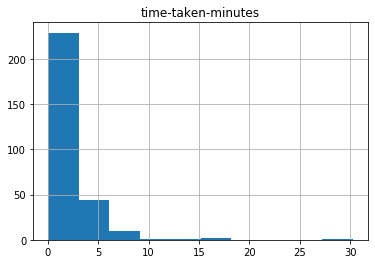

In [7]:
df.hist('time-taken-minutes')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121582150>]],
      dtype=object)

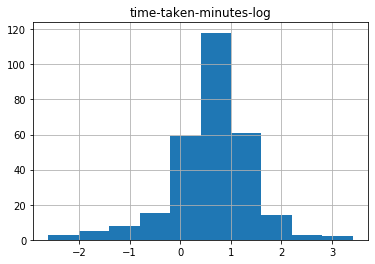

In [8]:
df['time-taken-minutes-log'] =  np.log(df['time-taken-minutes']) #df['time-taken-minutes']**(1/2) #df['time-taken-minutes']**(1/3)
df.hist('time-taken-minutes-log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124cf2950>]],
      dtype=object)

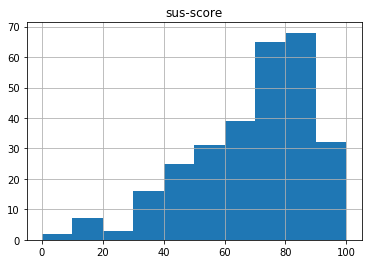

In [9]:
df.hist('sus-score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124ab8cd0>]],
      dtype=object)

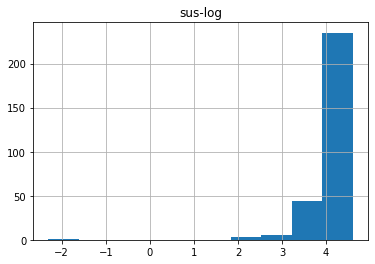

In [10]:
# susdf = df.loc[df['sus-score'] > 20]
# max_sus_score = susdf['sus-score'].max()
# min_sus_score = susdf['sus-score'].min()

df['sus-log'] = np.log(df['sus-score'])
df.hist('sus-log')
# susdf['sus-score']**(1/2) #(susdf['sus-score'] - susdf['sus-score'].mean())/susdf['sus-score'].std(ddof=0)
# susdf['sus-z'] = (susdf['sus-score'] - min_sus_score) / (max_sus_score - min_sus_score)
# susdf.hist('sus-z')

# # # susdf['sus-score-log'] =   susdf['sus-score']**(1/3) #np.log(susdf['sus-score'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124eea4d0>]],
      dtype=object)

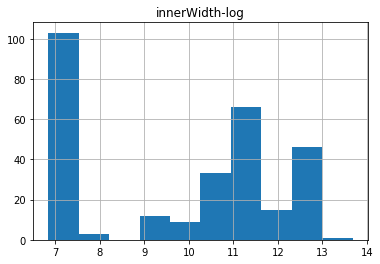

In [11]:
df['innerWidth-log'] =  df['innerWidth']**(1/3) #np.log(df['innerWidth'])
df.hist('innerWidth-log')
# max_sus_score = susdf['sus-score'].max()
# min_sus_score = susdf['sus-score'].min()

# susdf['sus-score-fish'] = ((susdf['sus-score'] - susdf['sus-score'].min() / susdf['sus-score'].max() - susdf['sus-score'].min()) - 5) * 2
# susdf.hist('sus-score-fish')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124fe7690>]],
      dtype=object)

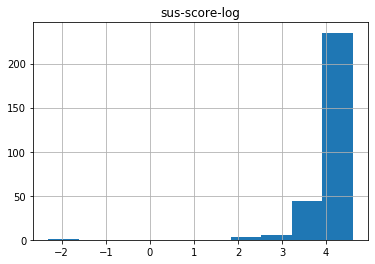

In [12]:
# def normalize(column):
#     upper = column.max()
#     lower = column.min()
#     y = (column - lower)/(upper-lower)
#     return y

# def sigmoid(x):
#     e = np.exp(1)
#     y = 1/(1+e**(-x))
#     return y

# df['sus-score-log'] = normalize(np.log(df['sus-score']+ 1))
# df['sus-score-log'] = sigmoid(df['sus-score'])
# df['sus-score-log'] = normalize( df['sus-score']**(1/3))
# log_max = np.log(df['sus-score'].max())
# df['sus-score-log'] =  df['sus-score']**(1/log_max)
# df['sus-score-log'] =  normalize(df['sus-score']**(1/log_max))
# df['sus-score-log'] = np.tanh(df['sus-score'])
# df['sus-score-log'] = np.log(df['sus-score'])
df['sus-score-log'] = np.log(df['sus-score'])


df.hist('sus-score-log')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124fd6f90>]],
      dtype=object)

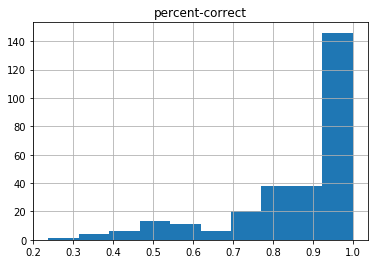

In [13]:
perdf = df.loc[df['percent-correct'] > .2]
perdf.hist('percent-correct')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1251ffe90>]],
      dtype=object)

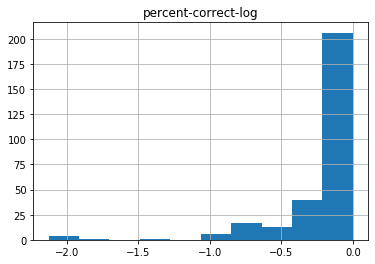

In [14]:
# from scipy.stats import boxcox

# perdf['percent-correct-log'] = boxcox
# perdf['percent-correct-log'] = np.sqrt((perdf['percent-correct']))

# # boxcox(perdf['percent-correct'], lmbda=-1)

# # np.log(perdf['percent-correct']) #perdf['percent-correct']**1/2 #normalize(np.log(df['percent-correct']+ 1))
# perdf.hist('percent-correct-log')
df['percent-correct-log'] = np.log(df['percent-correct'])

df.hist('percent-correct-log') 

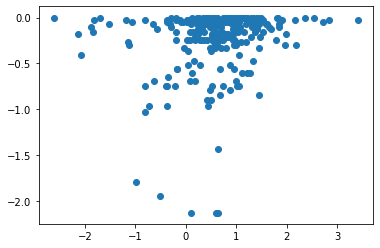

In [15]:
plt.scatter(df['time-taken-minutes-log'], df['percent-correct-log'])

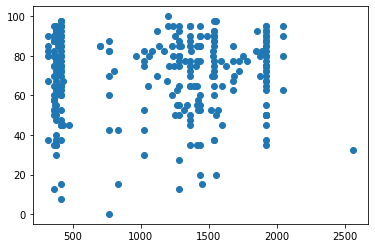

In [16]:
plt.scatter(df['innerWidth'], df['sus-score'])

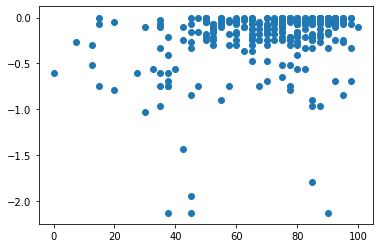

In [17]:
plt.scatter(df['sus-score'], df['percent-correct-log'])

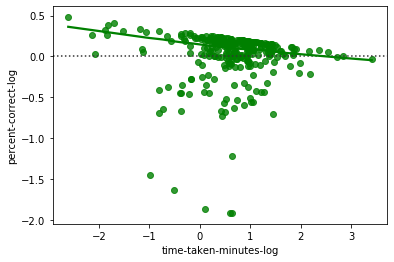

In [18]:
sns.residplot(df['time-taken-minutes-log'], df['percent-correct-log'], lowess=True, color="g")


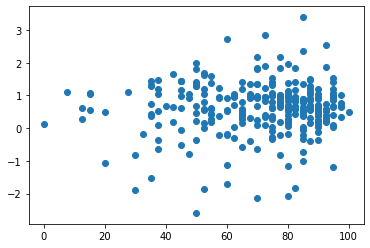

In [19]:
plt.scatter(df['sus-score'], df['time-taken-minutes-log'])

In [20]:
# Create linear regression object
X = df[['time-taken-minutes-log']]
Y = df[['percent-correct-log']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     percent-correct-log   R-squared:                       0.036
Model:                             OLS   Adj. R-squared:                  0.033
Method:                  Least Squares   F-statistic:                     10.72
Date:                 Sun, 12 Apr 2020   Prob (F-statistic):            0.00119
Time:                         14:23:16   Log-Likelihood:                -92.311
No. Observations:                  288   AIC:                             188.6
Df Residuals:                      286   BIC:                             195.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2670      0.025    -10.642      0.000      -0.316      -0.218
time-taken-minutes-log     0.0812      0.025      3.274      0.001       0.032       0.130
==============================================================================
Omnibus:                      218.054   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2396.579
Skew:                          -3.115   Prob(JB):                         0.00
Kurtosis:                      15.685   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
X = df[['time-taken-minutes-log']]
Y = df[['sus-score']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sus-score   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.540
Date:                Sun, 12 Apr 2020   Prob (F-statistic):              0.216
Time:                        14:23:16   Log-Likelihood:                -1270.8
No. Observations:                 288   AIC:                             2546.
Df Residuals:                     286   BIC:                             2553.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     69.0043      1.501     45.959      0.000      66.049      71.960
time-taken-minutes-log     1.8423      1.484      1.241      0.216      -1.080       4.764
==============================================================================
Omnibus:                       34.290   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.890
Skew:                          -0.920   Prob(JB):                     4.86e-10
Kurtosis:                       3.433   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
X = df[['time-taken-minutes-log']]
Y = df[['percent-correct-log']]
model_Simple = sm.OLS(Y, X).fit()
model = sm.OLS(Y, sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     percent-correct-log   R-squared:                       0.036
Model:                             OLS   Adj. R-squared:                  0.033
Method:                  Least Squares   F-statistic:                     10.72
Date:                 Sun, 12 Apr 2020   Prob (F-statistic):            0.00119
Time:                         14:23:16   Log-Likelihood:                -92.311
No. Observations:                  288   AIC:                             188.6
Df Residuals:                      286   BIC:                             195.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.2670      0.025    -10.642      0.000      -0.316      -0.218
time-taken-minutes-log     0.0812      0.025      3.274      0.001       0.032       0.130
==============================================================================
Omnibus:                      218.054   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2396.579
Skew:                          -3.115   Prob(JB):                         0.00
Kurtosis:                      15.685   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

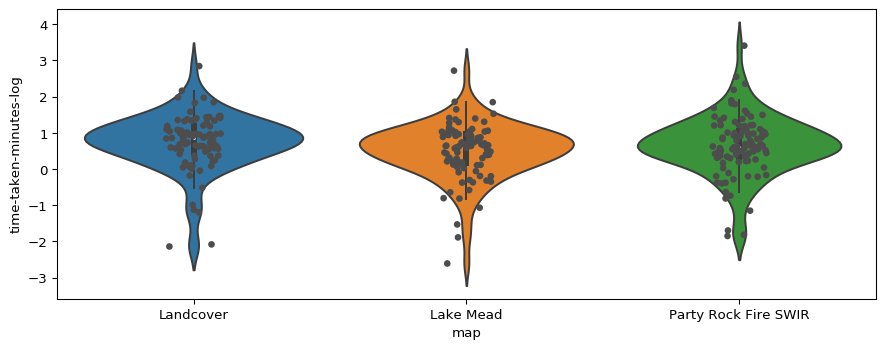

In [23]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map',y='time-taken-minutes-log', data=df)
sns.stripplot(x='map',y='time-taken-minutes-log', color=".3", data=df)

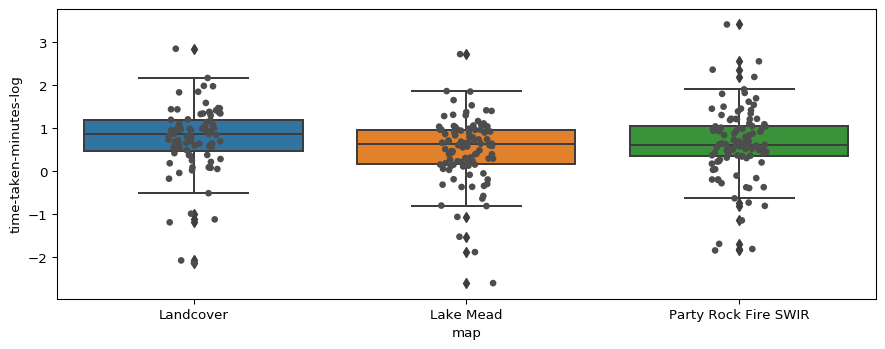

In [24]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map',y='time-taken-minutes-log', data=df)
sns.stripplot(x='map',y='time-taken-minutes-log', color=".3", data=df)

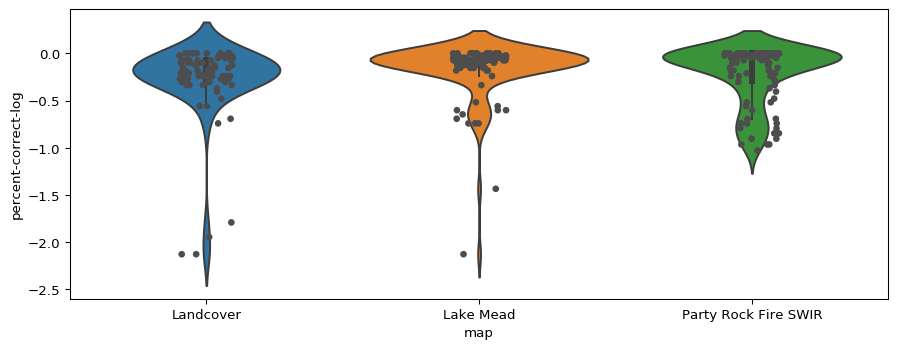

In [25]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='map',y='percent-correct-log', data=df)
sns.stripplot(x='map',y='percent-correct-log', color=".3", data=df)

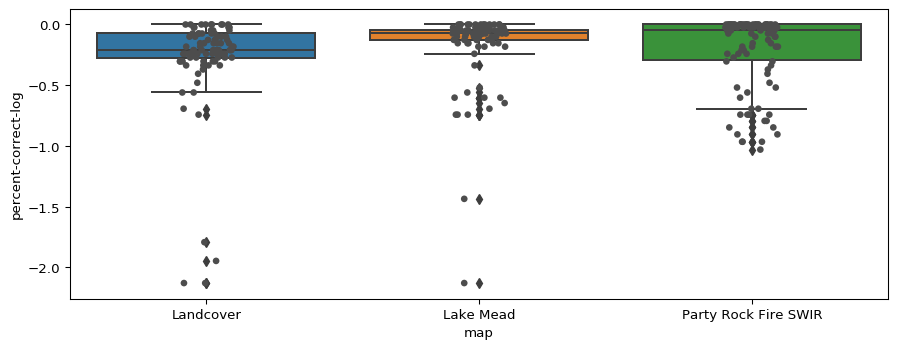

In [26]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='map',y='percent-correct-log', data=df)
sns.stripplot(x='map',y='percent-correct-log', color=".3", data=df)

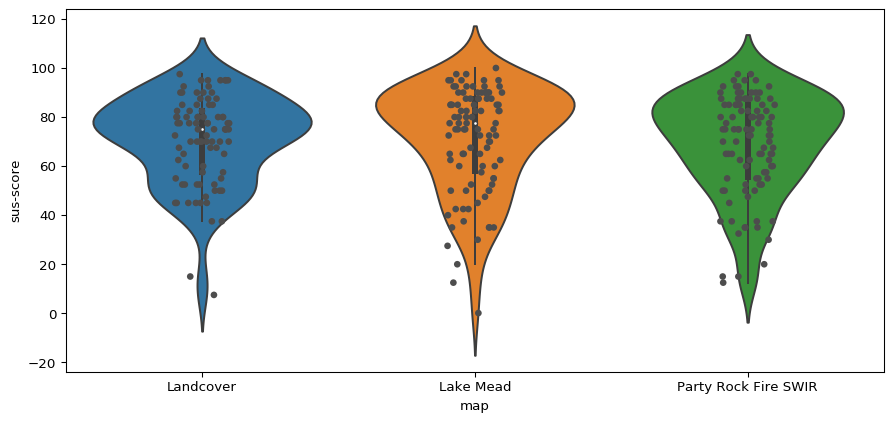

In [27]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='map',y='sus-score', data=df)
sns.stripplot(x='map',y='sus-score', color=".3", data=df)

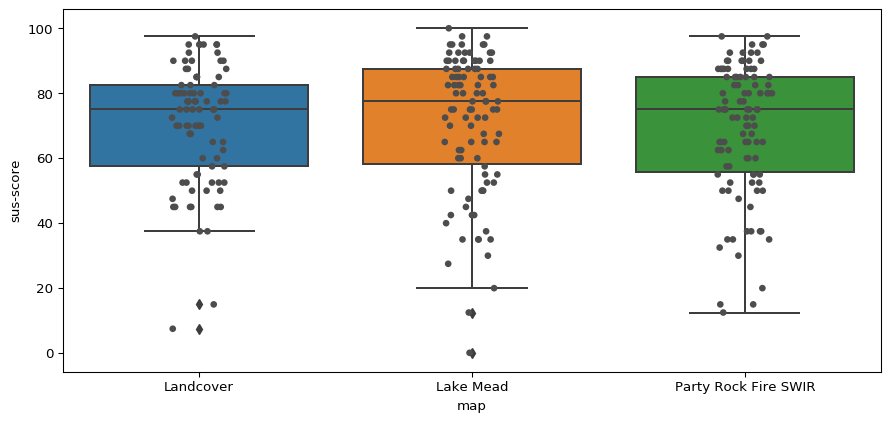

In [28]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='map',y='sus-score', data=df)
sns.stripplot(x='map',y='sus-score', color=".3", data=df)

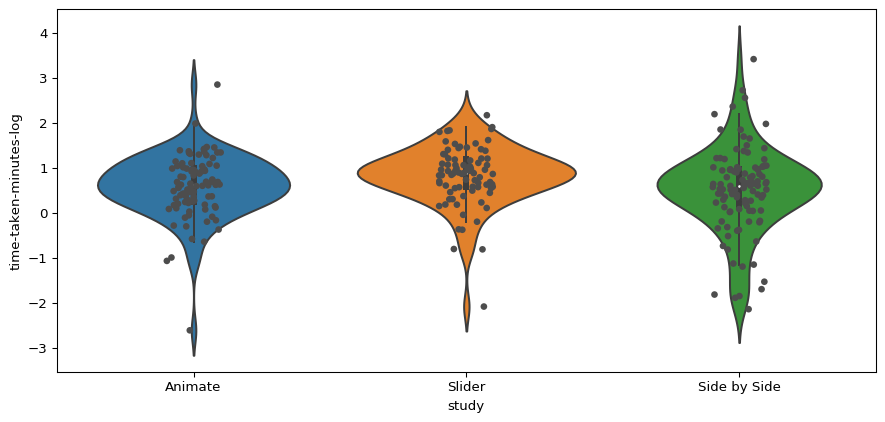

In [29]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study',y='time-taken-minutes-log', data=df)
sns.stripplot(x='study',y='time-taken-minutes-log', color=".3", data=df)

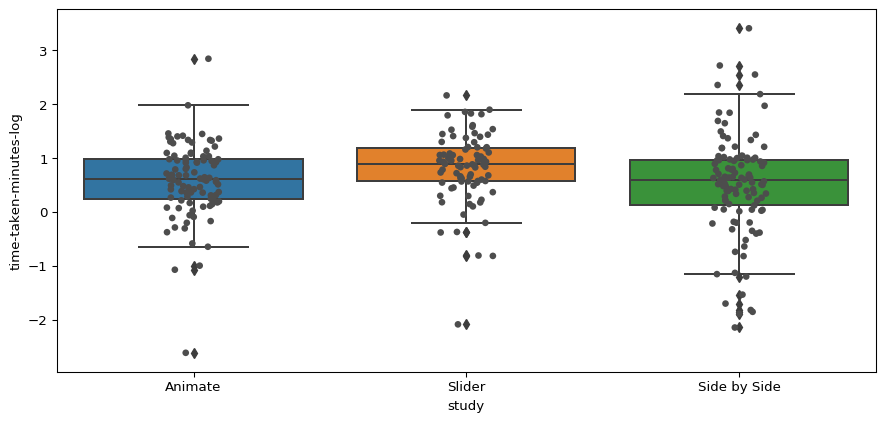

In [30]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study',y='time-taken-minutes-log', data=df)
sns.stripplot(x='study',y='time-taken-minutes-log', color=".3", data=df)

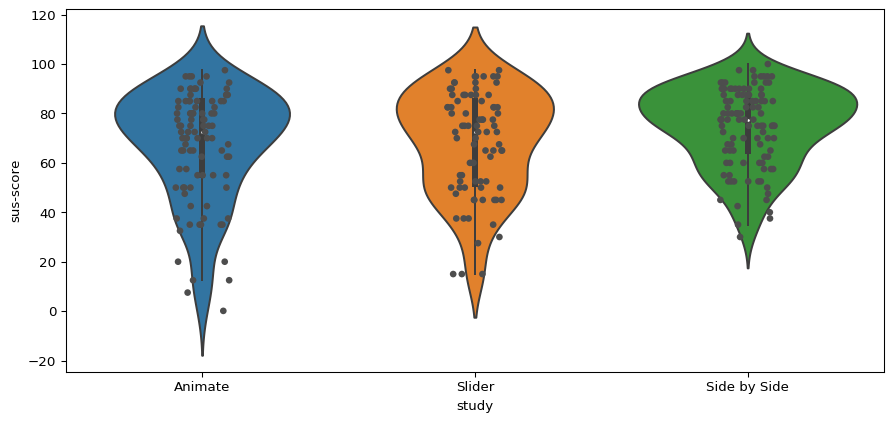

In [31]:
plt.figure(figsize=(11,5), dpi=96)
sns.violinplot(x='study',y='sus-score', data=df)
sns.stripplot(x='study',y='sus-score', color=".3", data=df)


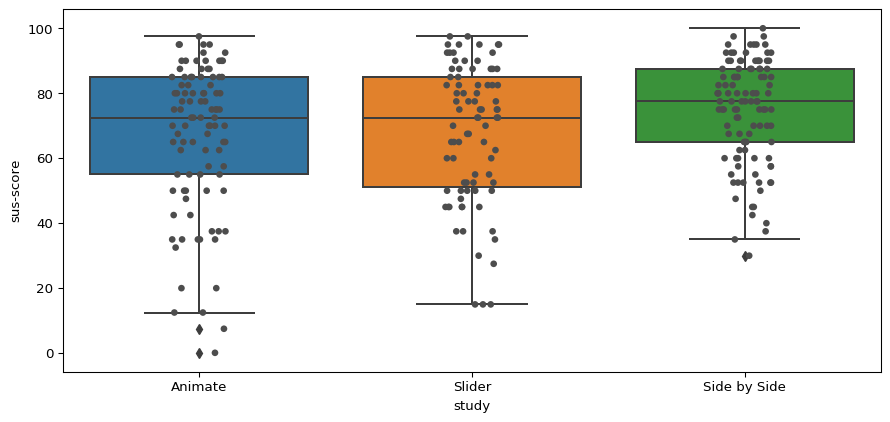

In [32]:
plt.figure(figsize=(11,5), dpi=96)
sns.boxplot(x='study',y='sus-score', data=df)
sns.stripplot(x='study',y='sus-score', color=".3", data=df)


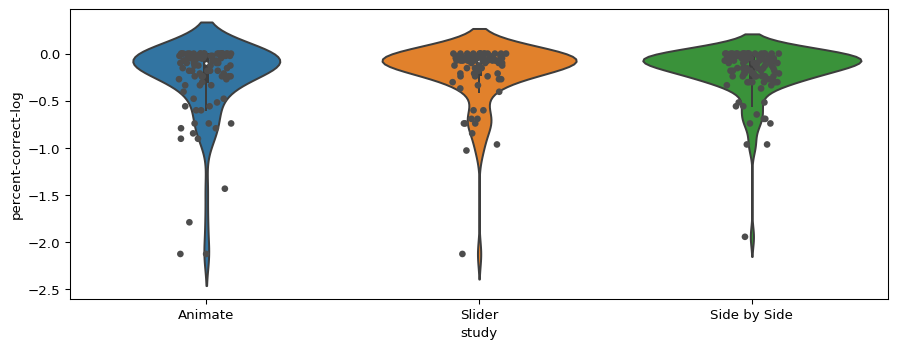

In [33]:
plt.figure(figsize=(11,4), dpi=96)
sns.violinplot(x='study',y='percent-correct-log', data=df)
sns.stripplot(x='study',y='percent-correct-log', color=".3", data=df)

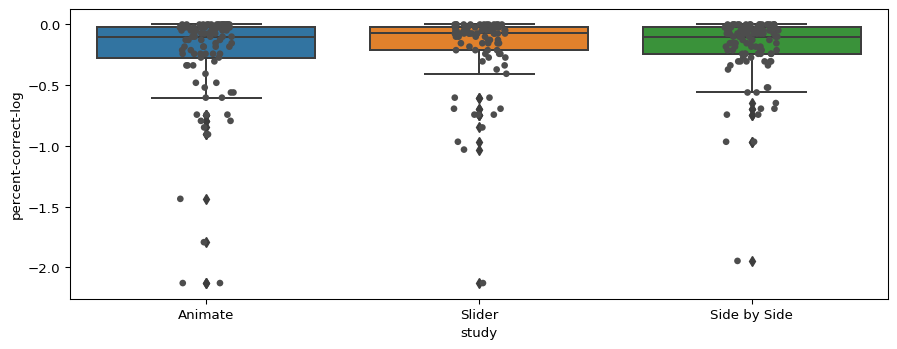

In [34]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='percent-correct-log', data=df)
sns.stripplot(x='study',y='percent-correct-log', color=".3", data=df)

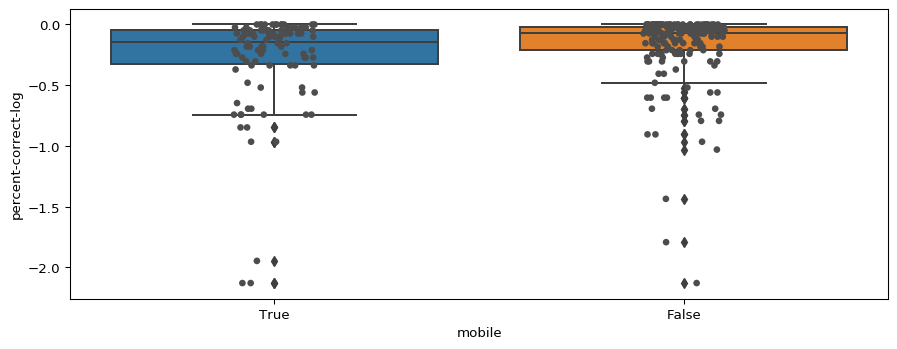

In [35]:
plt.figure(figsize=(11,4), dpi=96)
# d['test'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False') 
# df['mobile'] = df['availWidth'].apply(lambda x: 'True' if x <= 450 else 'False')

# df['availWidth'] < 450

# df['test'] = df['availWidth'].astype(int)
sns.boxplot(x='mobile',y='percent-correct-log', data=df)
sns.stripplot(x='mobile',y='percent-correct-log', color=".3", data=df)
# plt.scatter(df['availWidth'], df['time-taken-minutes'])
# df.hist('test')

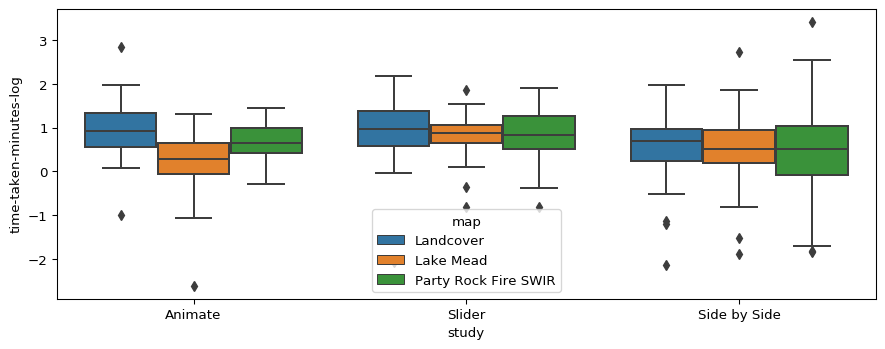

In [36]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='time-taken-minutes-log', hue='map', data=df)


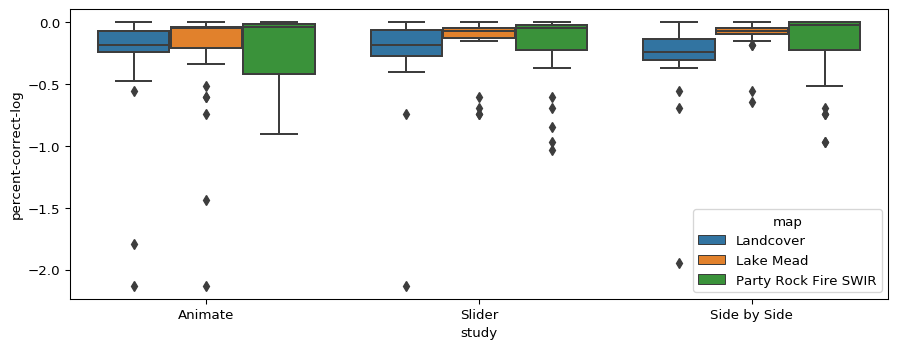

In [37]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='percent-correct-log', hue='map', data=df)

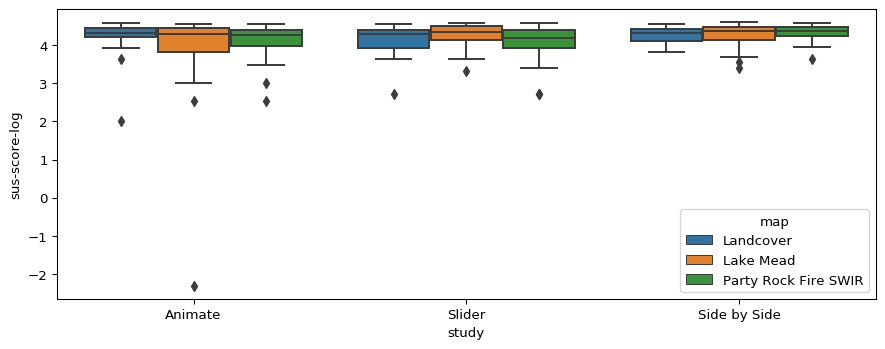

In [38]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='study',y='sus-score-log', hue='map', data=df)

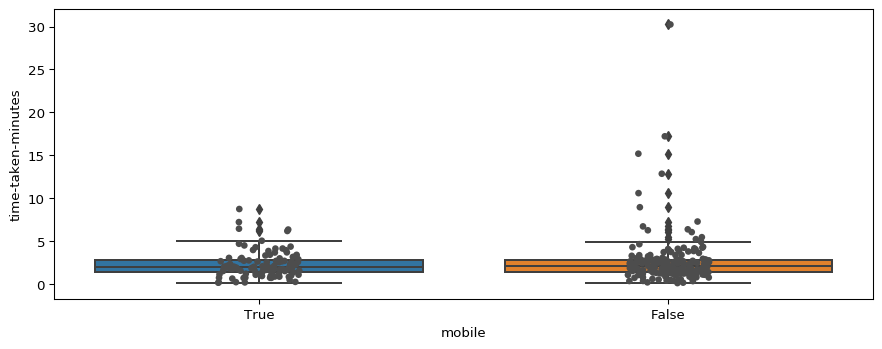

In [39]:
plt.figure(figsize=(11,4), dpi=96)
sns.boxplot(x='mobile',y='time-taken-minutes', data=df)
sns.stripplot(x='mobile',y='time-taken-minutes', color=".3", data=df)

In [40]:

import scipy.stats as stats
import scikit_posthocs as sp
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [41]:

statdf = df.loc[:, ('study', 'mobile', 'map','time-taken-minutes-log', 'percent-correct-log','sus-score')]
statdf = df[['study', 'map','mobile', 'sus-score', 'time-taken-minutes-log', 'percent-correct-log']]
statdf = statdf.rename(columns={'time-taken-minutes-log': 'time', 'sus-score': 'sus', 'percent-correct-log': 'correct'})
statdf

study                   map mobile   sus      time   correct
275       Animate             Landcover   True  67.5  1.364283 -0.126752
366       Animate             Lake Mead  False  90.0  0.599038 -2.128232
122        Slider  Party Rock Fire SWIR   True  70.0  1.816842  0.000000
304       Animate             Landcover   True  37.5  0.101503 -2.128232
276  Side by Side             Lake Mead  False  82.5  0.961736 -0.074108
..            ...                   ...    ...   ...       ...       ...
179  Side by Side             Lake Mead  False  97.5  0.783407  0.000000
337       Animate  Party Rock Fire SWIR  False  82.5  0.592894 -0.024098
136  Side by Side  Party Rock Fire SWIR  False  65.0  0.399235 -0.024098
338  Side by Side             Lake Mead  False  87.5  0.656362 -0.048790
35         Slider             Landcover  False  77.5  1.830473  0.000000

[288 rows x 6 columns]

In [42]:
statdf['both'] = df[['study', 'map']].agg('-'.join, axis=1) 
rp.summary_cont(statdf['time'].groupby(statdf['both']))

N      Mean        SD        SE  \
both                                                                  
Animate-Lake Mead                  31  0.217747  0.768669  0.138057   
Animate-Landcover                  29  0.879657  0.695671  0.129183   
Animate-Party Rock Fire SWIR       36  0.676973  0.442677  0.073780   
Side by Side-Lake Mead             35  0.492323  0.860534  0.145457   
Side by Side-Landcover             35  0.539640  0.821692  0.138891   
Side by Side-Party Rock Fire SWIR  39  0.488638  1.127082  0.180478   
Slider-Lake Mead                   32  0.778858  0.524721  0.092758   
Slider-Landcover                   24  0.873434  0.813290  0.166012   
Slider-Party Rock Fire SWIR        27  0.831135  0.666713  0.128309   

                                   95% Conf.  Interval  
both                                                    
Animate-Lake Mead                  -0.057318  0.492812  
Animate-Landcover                   0.621976  1.137337  
Animate-Party Rock Fire SWIR        0.530314  0.823632  
Side by Side-Lake Mead              0.203065  0.781580  
Side by Side-Landcover              0.263439  0.815841  
Side by Side-Party Rock Fire SWIR   0.130277  0.846998  
Slider-Lake Mead                    0.594143  0.963574  
Slider-Landcover                    0.541052  1.205816  
Slider-Party Rock Fire SWIR         0.574858  1.087411

In [43]:
rp.summary_cont(statdf['correct'].groupby(statdf['both']))

N      Mean        SD        SE  \
both                                                                  
Animate-Lake Mead                  31 -0.252623  0.463636  0.083271   
Animate-Landcover                  29 -0.294732  0.482541  0.089606   
Animate-Party Rock Fire SWIR       36 -0.246028  0.320493  0.053415   
Side by Side-Lake Mead             35 -0.103107  0.133121  0.022502   
Side by Side-Landcover             35 -0.269869  0.325911  0.055089   
Side by Side-Party Rock Fire SWIR  39 -0.184753  0.282762  0.045278   
Slider-Lake Mead                   32 -0.146185  0.215929  0.038171   
Slider-Landcover                   24 -0.265872  0.429422  0.087655   
Slider-Party Rock Fire SWIR        27 -0.211373  0.319503  0.061488   

                                   95% Conf.  Interval  
both                                                    
Animate-Lake Mead                  -0.418533 -0.086714  
Animate-Landcover                  -0.473468 -0.115997  
Animate-Party Rock Fire SWIR       -0.352208 -0.139849  
Side by Side-Lake Mead             -0.147854 -0.058360  
Side by Side-Landcover             -0.379420 -0.160318  
Side by Side-Party Rock Fire SWIR  -0.274659 -0.094848  
Slider-Lake Mead                   -0.222197 -0.070172  
Slider-Landcover                   -0.441372 -0.090373  
Slider-Party Rock Fire SWIR        -0.334185 -0.088560

In [44]:
rp.summary_cont(statdf['sus'].groupby(statdf['both']))

N       Mean         SD        SE  \
both                                                                    
Animate-Lake Mead                  31  64.519355  25.782648  4.630700   
Animate-Landcover                  29  72.327586  19.236905  3.572204   
Animate-Party Rock Fire SWIR       36  65.000000  21.455935  3.575989   
Side by Side-Lake Mead             35  74.285714  18.625286  3.148248   
Side by Side-Landcover             35  72.285714  15.355726  2.595591   
Side by Side-Party Rock Fire SWIR  39  77.115385  13.807159  2.210915   
Slider-Lake Mead                   32  73.750000  19.060599  3.369470   
Slider-Landcover                   24  66.145833  20.175577  4.118322   
Slider-Party Rock Fire SWIR        27  62.314815  23.214364  4.467606   

                                   95% Conf.   Interval  
both                                                     
Animate-Lake Mead                  55.293153  73.745557  
Animate-Landcover                  65.202137  79.453035  
Animate-Party Rock Fire SWIR       57.891639  72.108361  
Side by Side-Lake Mead             68.025062  80.546366  
Side by Side-Landcover             67.124083  77.447345  
Side by Side-Party Rock Fire SWIR  72.725343  81.505426  
Slider-Lake Mead                   67.040166  80.459834  
Slider-Landcover                   57.900312  74.391354  
Slider-Party Rock Fire SWIR        53.391501  71.238129

In [45]:
rp.summary_cont(df['time-taken-minutes'].groupby(df['study']))

N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96  2.245138  1.923208  0.196287   1.858397  2.631879
Side by Side  109  2.583647  3.549997  0.340028   1.914114  3.253181
Slider         83  2.715203  1.558798  0.171100   2.377808  3.052599

In [46]:
rp.summary_cont(df['time-taken-minutes'].groupby(df['map']))

N      Mean        SD        SE  95% Conf.  Interval
map                                                                         
Lake Mead              98  2.116113  1.785503  0.180363   1.760784  2.471442
Landcover              88  2.718328  2.216067  0.236233   2.252657  3.183999
Party Rock Fire SWIR  102  2.705106  3.393527  0.336009   2.043276  3.366936

In [47]:
rp.summary_cont(df['percent-correct'].groupby(statdf['map']))

N      Mean        SD        SE  95% Conf.  Interval
map                                                                         
Lake Mead              98  0.876093  0.167766  0.016947   0.842707  0.909480
Landcover              88  0.800054  0.184694  0.019688   0.761244  0.838865
Party Rock Fire SWIR  102  0.840570  0.206884  0.020485   0.800222  0.880918

In [48]:
rp.summary_cont(df['percent-correct'].groupby(statdf['study']))

N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96  0.817956  0.218982  0.022350   0.773921  0.861992
Side by Side  109  0.853429  0.162946  0.015607   0.822698  0.884161
Slider         83  0.848824  0.184556  0.020258   0.808877  0.888770

In [49]:
rp.summary_cont(statdf['sus'].groupby(statdf['map']))

N       Mean         SD        SE  95% Conf.  \
map                                                                    
Lake Mead              98  71.021429  21.519894  2.173838  66.738801   
Landcover              88  70.625000  18.068556  1.926114  66.828181   
Party Rock Fire SWIR  102  68.921569  20.323832  2.012359  64.957867   

                       Interval  
map                              
Lake Mead             75.304056  
Landcover             74.421819  
Party Rock Fire SWIR  72.885270

In [50]:
# time taken statistics
rp.summary_cont(statdf['time'].groupby(statdf['study']))

N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96  0.589908  0.689289  0.070350   0.451298  0.728519
Side by Side  109  0.506198  0.945082  0.090522   0.327954  0.684441
Slider         83  0.823211  0.657330  0.072151   0.680935  0.965487

In [51]:
# Accuracy statistics
rp.summary_cont(statdf['correct'].groupby(statdf['study']))

N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96 -0.262871  0.418096  0.042672  -0.346946 -0.178795
Side by Side  109 -0.185867  0.267688  0.025640  -0.236354 -0.135381
Slider         83 -0.201999  0.322731  0.035424  -0.271853 -0.132145

In [52]:
# SUS Score taken statistics
rp.summary_cont(statdf['sus'].groupby(statdf['study']))

N       Mean         SD        SE  95% Conf.   Interval
study                                                                  
Animate        96  67.058333  22.378099  2.283955  62.558282  71.558385
Side by Side  109  74.655963  15.955189  1.528230  71.646797  77.665129
Slider         83  67.831325  21.140396  2.320460  63.255576  72.407075

In [53]:
# an_time = statdf['correct'][statdf['study'] == 'Animate']
# ss_time = statdf['correct'][statdf['study'] == 'Side by Side']
# sl_time = statdf['correct'][statdf['study'] == 'Slider']
# # an_time = statdf['correct'][statdf['map'] == 'Party Rock Fire SWIR']
# # ss_time = statdf['correct'][statdf['map'] == 'Landcover']
# # sl_time = statdf['correct'][statdf['map'] == 'Lake Mead']
# stat, p = stats.kruskal(ss_time, sl_time)
# print('stat=%.3f, p=%.3f' % (stat, p))
# if p > 0.05:
# 	print('Probably the same distribution')
# else:
# 	print('Probably different distributions')


In [54]:
print('Study and Time')

# Time taken statistics
stats_table = rp.summary_cont(statdf['time'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('time ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'time'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='time', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider']) 
print(levene)

Study and Time


Stats Table
                N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96  0.589908  0.689289  0.070350   0.451298  0.728519
Side by Side  109  0.506198  0.945082  0.090522   0.327954  0.684441
Slider         83  0.823211  0.657330  0.072151   0.680935  0.965487

oneway Table
F_onewayResult(statistic=3.958278692705173, pvalue=0.020155044834264006)

ANOVA Table
              sum_sq     df         F    PR(>F)
C(study)    4.917449    2.0  3.958279  0.020155
Residual  177.030595  285.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side  -0.0837 0.7101 -0.3436 0.1762  False
     Animate       Slider   0.2333 0.1204  -0.045 0.5116  False
Side by Side       Slider    0.317 0.0168  0.0465

In [55]:
print('Study and Correctness')

# Correctness taken statistics
stats_table = rp.summary_cont(statdf['correct'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('correct ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')

# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'correct'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='correct', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider']) 
print(levene)

Study and Correctness


Stats Table
                N      Mean        SD        SE  95% Conf.  Interval
study                                                               
Animate        96 -0.262871  0.418096  0.042672  -0.346946 -0.178795
Side by Side  109 -0.185867  0.267688  0.025640  -0.236354 -0.135381
Slider         83 -0.201999  0.322731  0.035424  -0.271853 -0.132145

oneway Table
F_onewayResult(statistic=1.4131615301497225, pvalue=0.2450726927827947)

ANOVA Table
             sum_sq     df         F    PR(>F)
C(study)   0.326129    2.0  1.413162  0.245073
Residual  32.886099  285.0       NaN       NaN

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side    0.077 0.2393  -0.035  0.189  False
     Animate       Slider   0.0609 0.4586 -0.0591 0.1808  False
Side by Side       Slider  -0.0161    0.9 -0.1

In [56]:
print('Study and SUS Score')

# sus score taken statistics
stats_table = rp.summary_cont(statdf['sus'].groupby(statdf['study']))

print('Stats Table')
print(stats_table)
print('')

#one way nova
oneway_table = stats.f_oneway(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider'])

print('oneway Table')
print(oneway_table)
print('')
# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table')
print(anova_table)
print('')

# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')
# The Shapiro-Wilk test can be used to check the normal distribution of residuals . Null hypothesis: data is drawn from normal distribution.
# When the P-value is non significant we fail to reject null hypothesis and conclude that data is drawn from normal distribution.
w, pvalue = stats.shapiro(model.resid)
print('Shapiro-Wilk test normal distribution of residuals')
print(w, pvalue)
print('')

data = [statdf.loc[ids, 'sus'].values for ids in statdf.groupby('study').groups.values()]
H, p = stats.kruskal(*data)
print('kruskal pvalue')
print(p)
print('')

# Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
posthoc = sp.posthoc_conover(statdf, val_col='sus', group_col='study', p_adjust = 'holm')
print('kruskal posthoc')
print(posthoc)
print('')

#Levene test can be used to check the Homogeneity of variances when the data is not drawn from normal distribution.
# center : {‘mean’, ‘median’, ‘trimmed'}
# Three variations of Levene’s test are possible. The possibilities and their recommended usages are:
# ‘median’ : Recommended for skewed (non-normal) distributions>
# ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
# ‘trimmed’ : Recommended for heavy-tailed distributions.
# p-value of Levene's test is less than some significance level (typically 0.05), 
#    the obtained differences in sample variances are unlikely to have occurred based on random sampling 
#   from a population with equal varian
print('Levene test for equal variances')
levene = stats.levene(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider']) 
print(levene)

Study and SUS Score


Stats Table
                N       Mean         SD        SE  95% Conf.   Interval
study                                                                  
Animate        96  67.058333  22.378099  2.283955  62.558282  71.558385
Side by Side  109  74.655963  15.955189  1.528230  71.646797  77.665129
Slider         83  67.831325  21.140396  2.320460  63.255576  72.407075

oneway Table
F_onewayResult(statistic=4.562630610539725, pvalue=0.011208206179386379)

ANOVA Table
                 sum_sq     df         F    PR(>F)
C(study)    3576.926954    2.0  4.562631  0.011208
Residual  111714.520511  285.0       NaN       NaN

Tukey adhoc
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
     Animate Side by Side   7.5976 0.0178   1.0684 14.1269   True
     Animate       Slider    0.773    0.9  -6.2188  7.7648  False
Side by Si

In [57]:
# import formula api as alias smf #smfimport statsmodels.formula.api as smf

# est = ols(formula='study_question ~ time + sus + correct', data=statdf).fit()
# est.summary()
# print( C(statdf['study_question']) )
# est = ols(formula='time ~ C(study_question)', data=statdf).fit()
# est.summary()

# X = statdf[['sus', 'time']] 
# y = statdf['study']
# ## fit a OLS model with intercept on TV and Radio
# X = sm.add_constant(X)
# est = sm.OLS(y, X).fit()
# est.summary()

# model = ols('C(sus, Sum) + C(time, Sum) ~ C(study)', statdf).fit()
# model.summary()
# # model = ols('sus ~ C(study)*C(map)', statdf).fit()
# # # print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
# # m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf[['study','map']], alpha=0.05)
# # print('Tukey adhoc')
# # print(m_comp)
# # print('')

In [58]:
# data = [statdf.loc[ids, 'time'].values for ids in statdf.groupby('both').groups.values()]
# H, p = stats.kruskal(*data)
# print('kruskal pvalue')
# print(p)
# print('')

# # Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
# posthoc = sp.posthoc_conover(statdf, val_col='time', group_col='both', p_adjust = 'holm')
# print('kruskal posthoc')
# print(posthoc)
# print('')

In [59]:
# data = [statdf.loc[ids, 'sus'].values for ids in statdf.groupby('both').groups.values()]
# H, p = stats.kruskal(*data)
# print('kruskal pvalue')
# print(p)
# print('')

# # Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
# posthoc = sp.posthoc_conover(statdf, val_col='sus', group_col='both', p_adjust = 'holm')
# print('kruskal posthoc')
# print(posthoc)
# print('')

In [60]:
# data = [statdf.loc[ids, 'correct'].values for ids in statdf.groupby('both').groups.values()]
# H, p = stats.kruskal(*data)
# print('kruskal pvalue')
# print(p)
# print('')

# # Pairwise comparisons show that we may reject the null hypothesis (p < 0.01) for each pair of study and conclude that all groups (study) differ in their time taken.
# posthoc = sp.posthoc_conover(statdf, val_col='correct', group_col='both', p_adjust = 'holm')
# print('kruskal posthoc')
# print(posthoc)
# print('')

In [61]:
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')


Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side    0.077 0.2393  -0.035  0.189  False
     Animate       Slider   0.0609 0.4586 -0.0591 0.1808  False
Side by Side       Slider  -0.0161    0.9 -0.1327 0.1005  False
---------------------------------------------------------------



In [62]:
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['correct'], groups=statdf['map'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')


Tukey adhoc
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1         group2        meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
Lake Mead            Landcover  -0.1125 0.0627 -0.2296 0.0046  False
Lake Mead Party Rock Fire SWIR   -0.049  0.559 -0.1617 0.0638  False
Landcover Party Rock Fire SWIR   0.0635  0.403 -0.0524 0.1795  False
--------------------------------------------------------------------



In [63]:
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')


Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side  -0.0837 0.7101 -0.3436 0.1762  False
     Animate       Slider   0.2333 0.1204  -0.045 0.5116  False
Side by Side       Slider    0.317 0.0168  0.0465 0.5875   True
---------------------------------------------------------------



In [64]:
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['map'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')


Tukey adhoc
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1         group2        meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
Lake Mead            Landcover   0.2437  0.093 -0.0306  0.518  False
Lake Mead Party Rock Fire SWIR   0.1467  0.393 -0.1175  0.411  False
Landcover Party Rock Fire SWIR   -0.097 0.6634 -0.3687 0.1748  False
--------------------------------------------------------------------



In [65]:
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')


Tukey adhoc
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
     Animate Side by Side   7.5976 0.0178   1.0684 14.1269   True
     Animate       Slider    0.773    0.9  -6.2188  7.7648  False
Side by Side       Slider  -6.8246 0.0488 -13.6203 -0.0289   True
-----------------------------------------------------------------



In [66]:
# perform multiple pairwise comparison (Tukey HSD)
# Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf['map'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)
print('')


Tukey adhoc
        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
  group1         group2        meandiff p-adj   lower  upper  reject
--------------------------------------------------------------------
Lake Mead            Landcover  -0.3964    0.9 -7.3485 6.5556  False
Lake Mead Party Rock Fire SWIR  -2.0999 0.7215 -8.7958 4.5961  False
Landcover Party Rock Fire SWIR  -1.7034 0.8109 -8.5907 5.1838  False
--------------------------------------------------------------------



<Figure size 1248x480 with 0 Axes>

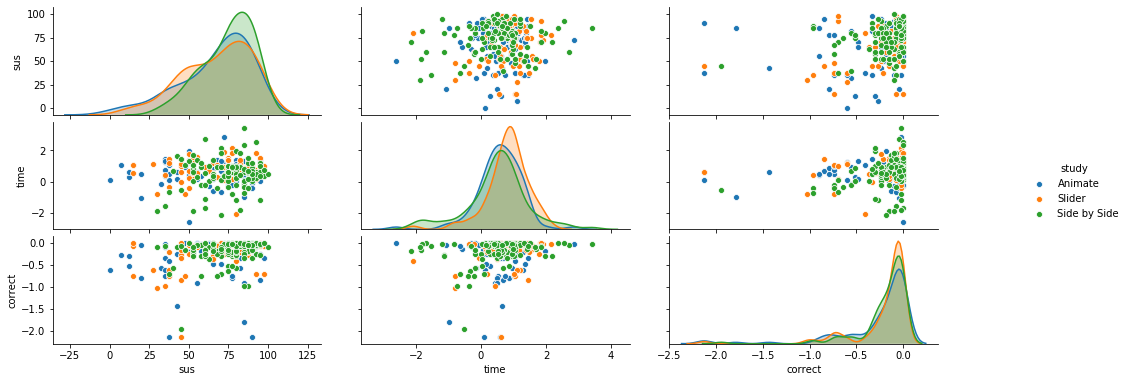

In [67]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="study")
g.fig.set_figheight(5)
g.fig.set_figwidth(16)
g                   

In [68]:
import plotly.express as px
import plotly.figure_factory as ff

# df = px.data.gapminder()
# fig = px.area(statdf, x="sus", y="sus", color="study")
# fig = px.histogram(statdf, x="time", y="time", color="study", marginal="rug")
# fig = px.line(statdf, x="sus", y="sus", color='study')
# fig.show()
# hist_data = [statdf]
# group_labels = ['sus'] # name of the dataset

# fig = ff.create_distplot(hist_data, group_labels)
fig = px.histogram(statdf, x="sus", y="sus", color="study",
                   marginal="box") # or violin, rug
                   #curve_type='normal')
fig.show()

<Figure size 1248x480 with 0 Axes>

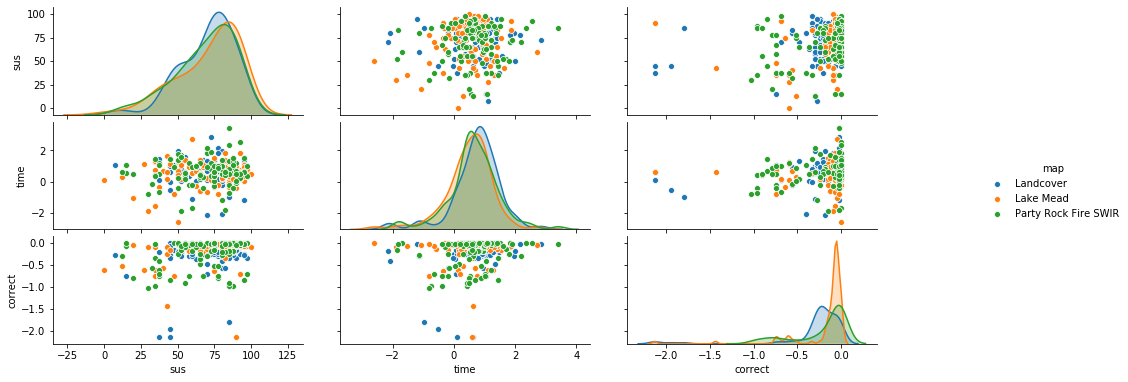

In [69]:
plt.figure(figsize=(13,5), dpi=96)
g = sns.pairplot(statdf, hue="map")
g.fig.set_figheight(5)
g.fig.set_figwidth(16)
g       

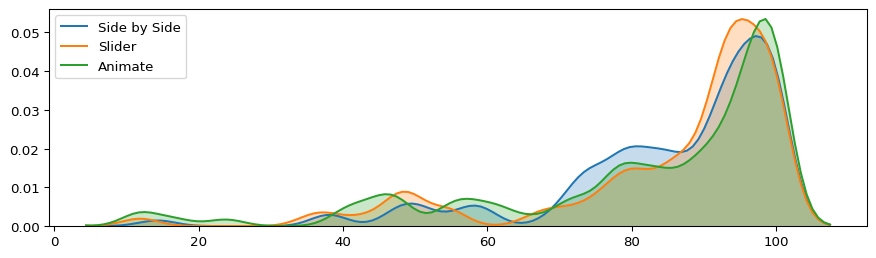

In [169]:
plt.figure(figsize=(11,3), dpi=96)
df['percent-correct-full'] = df['percent-correct'] * 100
ax = sns.kdeplot(df['percent-correct-full'][df['study'] == 'Side by Side'], bw=2.5, shade=True, label="Side by Side", legend=True)
ax = sns.kdeplot(df['percent-correct-full'][df['study'] == 'Slider'], bw=2.5,  shade=True, label="Slider", legend=True)
ax = sns.kdeplot(df['percent-correct-full'][df['study'] == 'Animate'], bw=2.5,  shade=True, label="Animate", legend=True)



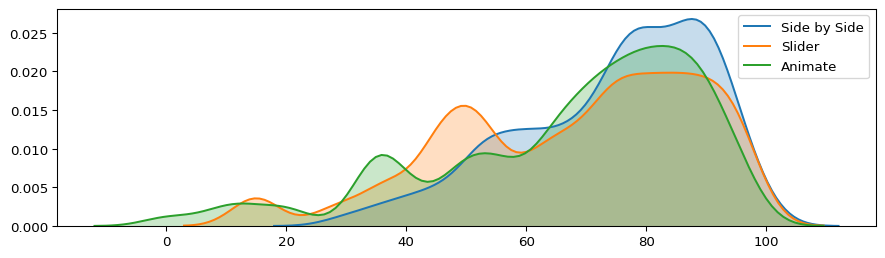

In [173]:
plt.figure(figsize=(11,3), dpi=96)
ax = sns.kdeplot(df['sus-score'][df['study'] == 'Side by Side'], bw=4, shade=True, label="Side by Side", legend=True)
ax = sns.kdeplot(df['sus-score'][df['study'] == 'Slider'], bw=4, shade=True, label="Slider", legend=True)
ax = sns.kdeplot(df['sus-score'][df['study'] == 'Animate'], bw=4, shade=True, label="Animate", legend=True)



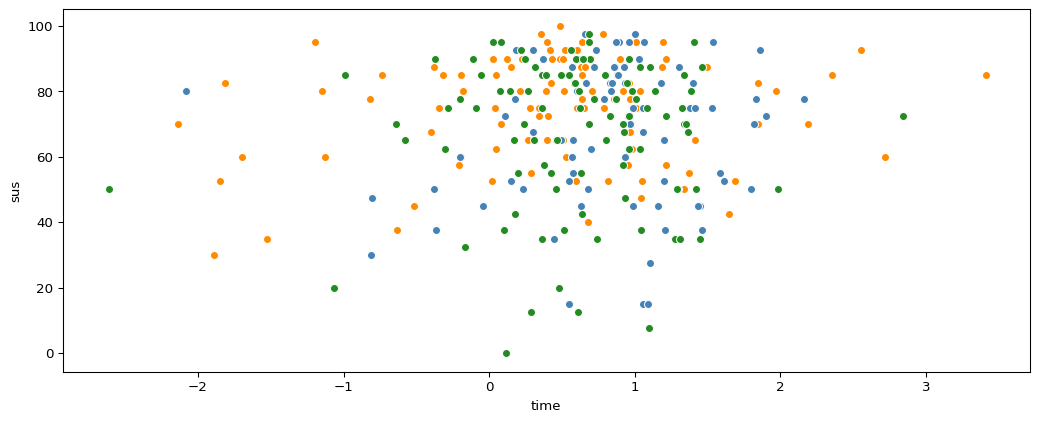

In [98]:
plt.figure(figsize=(13,5), dpi=96)

sbs =  statdf.loc[statdf['study'] == 'Side by Side']
slide =  statdf.loc[statdf['study'] == 'Slider']
anim =  statdf.loc[statdf['study'] == 'Animate']
ax = sns.scatterplot(x="time", y="sus", data=sbs, color='darkorange', legend="full")
ax = sns.scatterplot(x="time", y="sus", data=slide, color='steelblue', legend="full")
ax = sns.scatterplot(x="time", y="sus", data=anim, color='forestgreen', legend="full")

# ax = sns.kdeplot(statdf['time'][statdf['study'] == 'Side by Side'], statdf['sus'][statdf['study'] == 'Side by Side'])
# ax = sns.kdeplot(statdf['time'][statdf['study'] == 'Slider'], statdf['sus'][statdf['study'] == 'Slider'])
# ax = sns.kdeplot(df['percent-correct'][df['study'] == 'Slider'], df['sus-score'][df['study'] == 'Slider'],  cmap="Oranges", shade=True)
# ax = sns.kdeplot(statdf['time'][statdf['study'] == 'Animate'], statdf['sus'][statdf['study'] == 'Animate'],  shade=True)



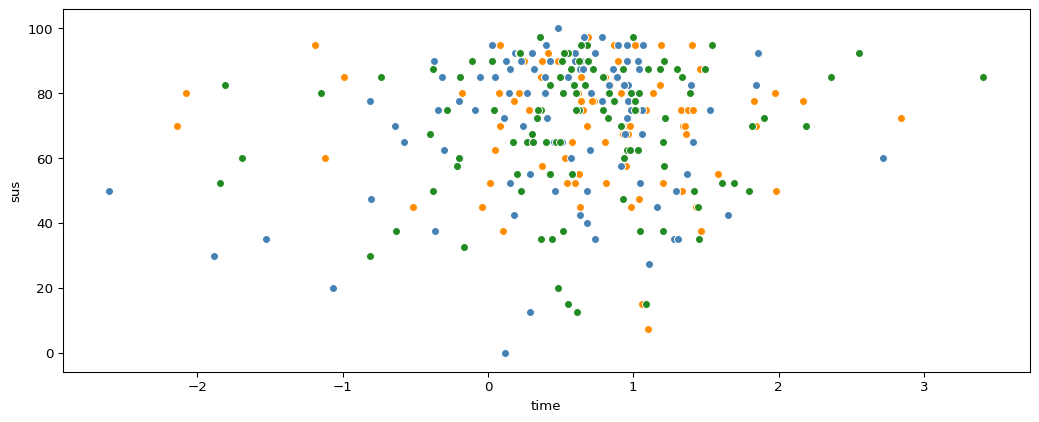

In [123]:
plt.figure(figsize=(13,5), dpi=96)

landcover =  statdf.loc[statdf['map'] == 'Landcover']
lakemead =  statdf.loc[statdf['map'] == 'Lake Mead']
oneband =  statdf.loc[statdf['map'] == 'Party Rock Fire SWIR']
ax = sns.scatterplot(x="time", y="sus", data=landcover, color='darkorange', legend="full")
ax = sns.scatterplot(x="time", y="sus", data=lakemead, color='steelblue', legend="full")
ax = sns.scatterplot(x="time", y="sus", data=oneband, color='forestgreen', legend="full")



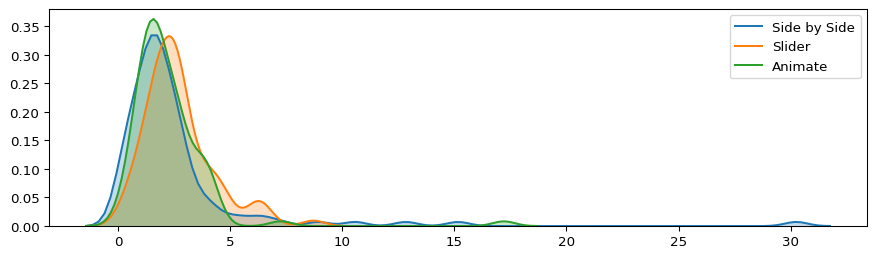

In [136]:
plt.figure(figsize=(11,3), dpi=96)
ax = sns.kdeplot(df['time-taken-minutes'][df['study'] == 'Side by Side'], bw=.5, shade=True, label="Side by Side", legend=True)
ax = sns.kdeplot(df['time-taken-minutes'][df['study'] == 'Slider'], bw=.5, shade=True, label="Slider", legend=True)
ax = sns.kdeplot(df['time-taken-minutes'][df['study'] == 'Animate'], bw=.5, shade=True, label="Animate", legend=True)



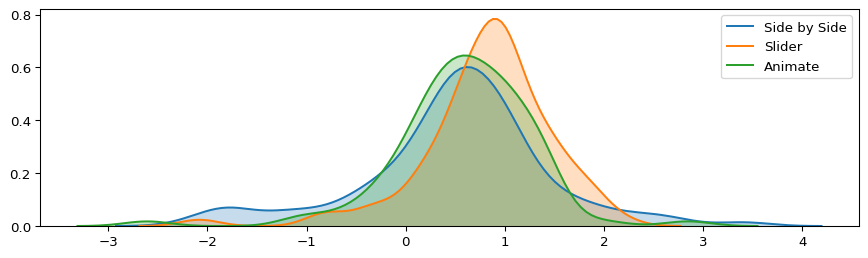

In [156]:
plt.figure(figsize=(11,3), dpi=96)
ax = sns.kdeplot(statdf['time'][statdf['study'] == 'Side by Side'], shade=True, label="Side by Side", legend=True)
ax = sns.kdeplot(statdf['time'][statdf['study'] == 'Slider'], shade=True, label="Slider", legend=True)
ax = sns.kdeplot(statdf['time'][statdf['study'] == 'Animate'], shade=True, label="Animate", legend=True)


In [74]:
# ax = sns.kdeplot(df['percent-correct'][df['study'] == 'Side by Side'], df['sus-score'][df['study'] == 'Side by Side'],  cmap="Blues", shade=True)


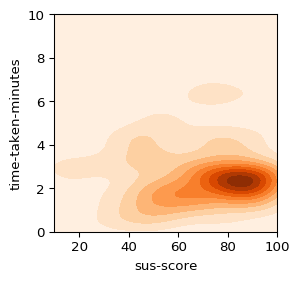

In [161]:
plt.figure(figsize=(3,3), dpi=96)
plt.xlim(10, 100)
plt.ylim(0, 10)
ax = sns.kdeplot(df['sus-score'][df['study'] == 'Slider'], df['time-taken-minutes'][df['study'] == 'Slider'], cmap="Oranges", shade=True)


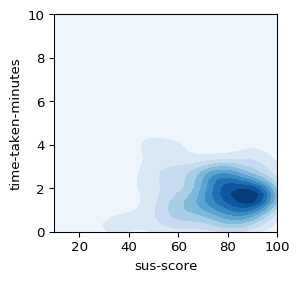

In [160]:
plt.figure(figsize=(3,3), dpi=96)
plt.xlim(10, 100)
plt.ylim(0, 10)
ax = sns.kdeplot(df['sus-score'][df['study'] == 'Side by Side'], df['time-taken-minutes'][df['study'] == 'Side by Side'], cmap="Blues", shade=True)


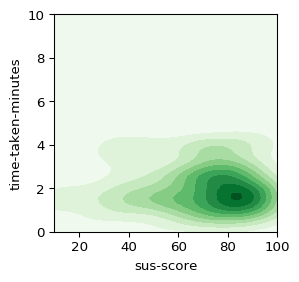

In [159]:
plt.figure(figsize=(3,3), dpi=96)
plt.xlim(10, 100)
plt.ylim(0, 10)
ax = sns.kdeplot(df['sus-score'][df['study'] == 'Animate'], df['time-taken-minutes'][df['study'] == 'Animate'],cmap="Greens",  shade=True)


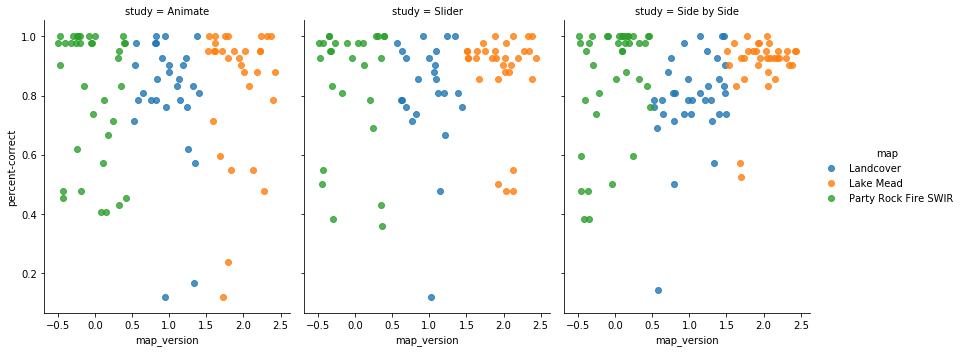

In [79]:
g = sns.lmplot(x="map_version", y="percent-correct", hue="map", col="study",
               data=df, height=5, aspect=.77, x_jitter=.5)

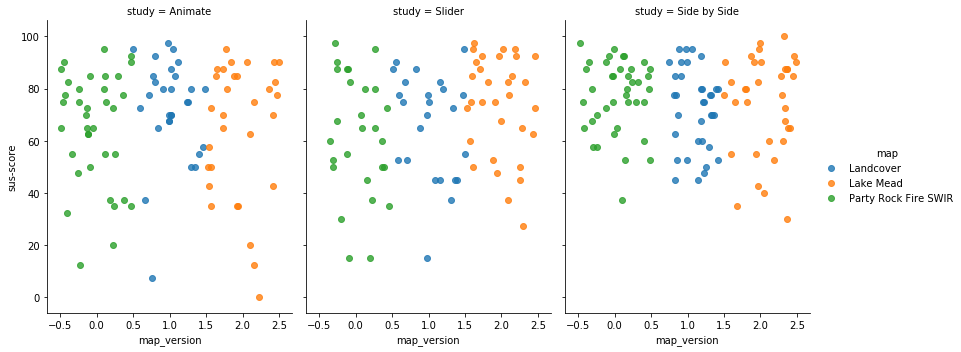

In [80]:
g = sns.lmplot(x="map_version", y="sus-score", hue="map", col="study",
               data=df, height=5, aspect=.77, x_jitter=.5)

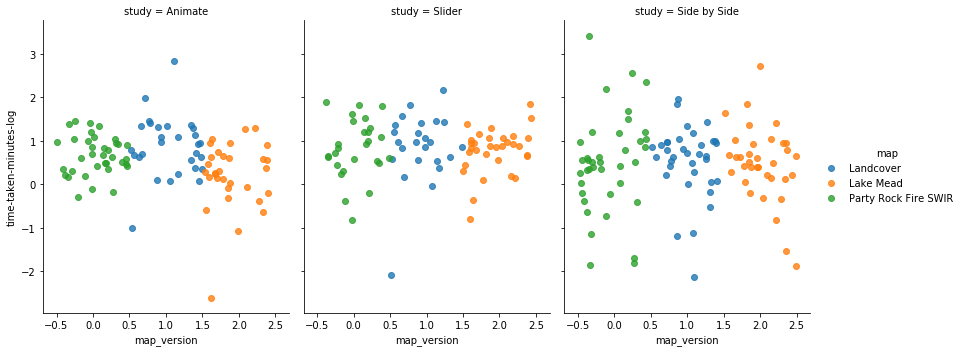

In [81]:
g = sns.lmplot(x="map_version", y="time-taken-minutes-log", hue="map", col="study",
               data=df, height=5, aspect=.77, x_jitter=.5)

In [82]:
# g = sns.lmplot(x="map_version", y="time-taken-minutes-log", hue="map", col="study",
#                data=df, height=6, aspect=.4, x_jitter=.5)

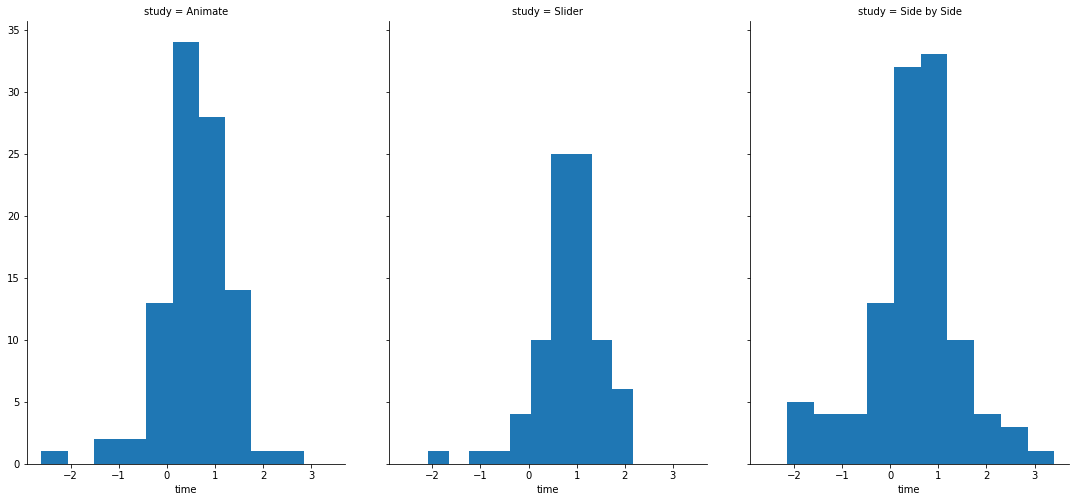

In [83]:
# f, ax = plt.subplots(figsize=(9, 6))
# heatdf = df.loc[:, ('study', 'map','sus-score')]
# heatdf
# sns.heatmap(heatdf, annot=True, fmt="d", linewidths=.5, ax=ax)
# uniform_data = np.random.rand(10, 12)
# uniform_data
# df = df.dropna
# ax = sns.heatmap(uniform_data)
# flights = statdf.pivot("index","sus-score", "both")
# flights

# g = sns.FacetGrid(statdf, col="map",  row="study")
# g = g.map(plt.hist, "sus")
# g
# bins = np.arange(0, 65, 5)
g = sns.FacetGrid(statdf, col="study", height=4, aspect=.5)
g = g.map(plt.hist, "time")
g.fig.set_figheight(8)
g.fig.set_figwidth(16)
g

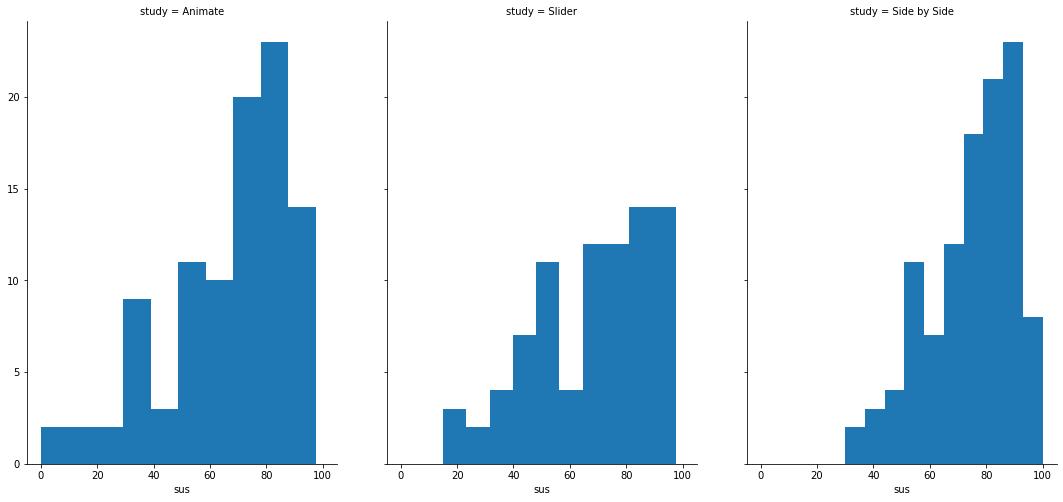

In [84]:
g = sns.FacetGrid(statdf, col="study", height=4, aspect=.5)
g = g.map(plt.hist, "sus")
g.fig.set_figheight(8)
g.fig.set_figwidth(16)
g

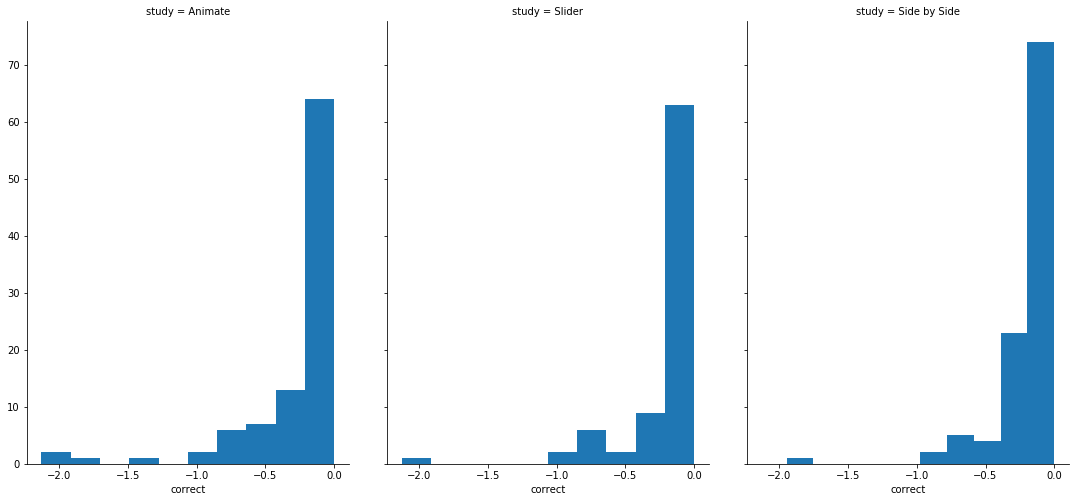

In [85]:
g = sns.FacetGrid(statdf, col="study", height=4, aspect=.5)
g = g.map(plt.hist, "correct")
g.fig.set_figheight(8)
g.fig.set_figwidth(16)
g

In [86]:
import plotly.figure_factory as ff
import numpy as np

x1 = df['percent-correct'][statdf['study'] == 'Animate']
x2 = df['percent-correct'][statdf['study'] == 'Side by Side']
x3 = df['percent-correct'][statdf['study'] == 'Slider']

group_labels = ['Animate', 'Side by Side', 'slider']
# group_labels = ['Animate', 'Side by Side', 'slider']

colors = ['Green', 'red', 'blue']
# colors = ['Green', 'red', 'blue']

hist_data = [x1, x2, x3]

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, curve_type='kde',show_hist=True, colors=colors)

# Add title
fig.update_layout(title_text='Distplot with Normal Distribution')
fig.show()

In [102]:
#one way nova
oneway_table = stats.f_oneway(statdf['time'][statdf['study'] == 'Animate'],
             statdf['time'][statdf['study'] == 'Side by Side'],
             statdf['time'][statdf['study'] == 'Slider'])

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('time ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table Study Time')
anova_table
# print('')




ANOVA Table Study Time


sum_sq     df         F    PR(>F)
C(study)    4.917449    2.0  3.958279  0.020155
Residual  177.030595  285.0       NaN       NaN

In [110]:
#one way nova
oneway_table = stats.f_oneway(statdf['correct'][statdf['study'] == 'Animate'],
             statdf['correct'][statdf['study'] == 'Side by Side'],
             statdf['correct'][statdf['study'] == 'Slider'])

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('correct ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table Study correct')
anova_table
# print('')

ANOVA Table Study correct


sum_sq     df         F    PR(>F)
C(study)   0.326129    2.0  1.413162  0.245073
Residual  32.886099  285.0       NaN       NaN

In [114]:
#one way nova
oneway_table = stats.f_oneway(statdf['sus'][statdf['study'] == 'Animate'],
             statdf['sus'][statdf['study'] == 'Side by Side'],
             statdf['sus'][statdf['study'] == 'Slider'])

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(study)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table Study sus')
anova_table
# print('')

ANOVA Table Study sus


sum_sq     df         F    PR(>F)
C(study)    3576.926954    2.0  4.562631  0.011208
Residual  111714.520511  285.0       NaN       NaN

In [117]:
#one way nova
oneway_table = stats.f_oneway(statdf['correct'][statdf['map'] == 'Landcover'],
             statdf['correct'][statdf['map'] == 'Lake Mead'],
             statdf['correct'][statdf['map'] == 'Party Rock Fire SWIR'])

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('correct ~ C(map)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table map correct')
anova_table

ANOVA Table map correct


sum_sq     df         F    PR(>F)
C(map)     0.588054    2.0  2.568575  0.078418
Residual  32.624174  285.0       NaN       NaN

In [118]:
#one way nova
oneway_table = stats.f_oneway(statdf['sus'][statdf['map'] == 'Landcover'],
             statdf['sus'][statdf['map'] == 'Lake Mead'],
             statdf['sus'][statdf['map'] == 'Party Rock Fire SWIR'])

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('sus ~ C(map)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table map correct')
anova_table

ANOVA Table map correct


sum_sq     df         F    PR(>F)
C(map)       248.184916    2.0  0.307418  0.735587
Residual  115043.262549  285.0       NaN       NaN

In [120]:
#one way nova
oneway_table = stats.f_oneway(statdf['time'][statdf['map'] == 'Landcover'],
             statdf['time'][statdf['map'] == 'Lake Mead'],
             statdf['time'][statdf['map'] == 'Party Rock Fire SWIR'])

# get ANOVA table — Ordinary Least Squares (OLS) model
# If the P-value (PR(>F)) obtained from ANOVA analysis is (P<0.05), we conclude that there are significant differences among treatments
model = ols('time ~ C(map)', data=statdf).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print('ANOVA Table map time')
anova_table

ANOVA Table map time


sum_sq     df         F    PR(>F)
C(map)      2.818673    2.0  2.242295  0.108085
Residual  179.129371  285.0       NaN       NaN

In [106]:
# # perform multiple pairwise comparison (Tukey HSD)
# # Results from Tukey HSD suggests that except A-C, all other pairwise comparisons for treatments rejects null hypothesis and indicates statistical significant differences.
m_comp = pairwise_tukeyhsd(endog=statdf['time'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)

Tukey adhoc
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
     Animate Side by Side  -0.0837 0.7101 -0.3436 0.1762  False
     Animate       Slider   0.2333 0.1204  -0.045 0.5116  False
Side by Side       Slider    0.317 0.0168  0.0465 0.5875   True
---------------------------------------------------------------


In [127]:
m_comp = pairwise_tukeyhsd(endog=statdf['sus'], groups=statdf['study'], alpha=0.05)
print('Tukey adhoc')
print(m_comp)

Tukey adhoc
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
     Animate Side by Side   7.5976 0.0178   1.0684 14.1269   True
     Animate       Slider    0.773    0.9  -6.2188  7.7648  False
Side by Side       Slider  -6.8246 0.0488 -13.6203 -0.0289   True
-----------------------------------------------------------------
